In [102]:
import numpy as np
import math

In [103]:
def sigmoid(x):
    return (1/(1+math.e**(-x)))


In [104]:
def sigmoidprime(x):
    return ((math.e**(-x))/(1+math.e**(-x))**2)

In [141]:
# To make sure that you get the implementation right let us first have a look at the data structure.
# These are the four possible input pairs of (x1,x2).
x = np.array([[0,0],[0,1],[1,0],[1,1]])

# These are possible labels for all logical gates/tasks.
tasks = {
    "t_and" : np.array([0,0,0,1]),
    "t_or" : np.array([0,1,1,1]),
    "t_nand" : np.array([1,1,1,0]),
    "t_nor" : np.array([1,0,0,0]),
    "t_xor" : np.array([0,1,1,0])
}

In [142]:
class Perceptron:
    
    def __init__(self, input_units):
        self.input_units = input_units
        # 1. Initialize random weights and a random bias term. Check 'np.random.randn()'.
        self.weights = np.random.randn(input_units)
        self.bias = np.random.randn()
        # 2. Define the learning rate as 1
        self.alpha = 1
        #store drive of neuron
        self.weighted_sum = 0
        
    def forward_step(self, input):
        # Perform a perceptron forward step.
        # 1. Calculate the drive. You can use @ as a matrix multiplication command.
        self.weighted_sum =  self.weights @ input + self.bias 

        # 2. Return activation of Perceptron, depending on whether the perceptron surpassed the threshold. 
        if self.weighted_sum >= 0:
            return sigmoid(self.weighted_sum)
        else:
            return 0
        
    
    def update(self, delta):
        self.bias -= self.alpha * delta
        self.weights -= self.alpha * delta * sigmoid(self.weighted_sum)
        
        
    

In [161]:
class MLP:
    
    def __init__(self):
        #Create array with 4 Perceptrons (hidden layer)
        self.perceptrons = np.array([Perceptron(2), Perceptron(2), Perceptron(2), Perceptron(2)])
        #Create the one read-out Perceptron
        self.readout_perceptron = Perceptron(4)
        #output of MLP
        self.output = 0.0
        
        #Storage of values about MLP, loss and accuracy
        accuracy = []
        loss = []
    
    def forward_step(self, sample):
        #Store if Perceptron fires or not, if drive gets above threshold
        activation = np.empty(4)
        #Processing drive for every Perceptron in hidden layer (self.perceptrons)
        for i in range(4):
            activation[i] = self.perceptrons[i].forward_step(sample)
        ####
        print("activation")
        print(activation)
        #Storing output of network
        self.output = self.readout_perceptron.forward_step(activation)
        ####
        print("output")
        print(self.output)
      
        return 
        
        
    def backprop_step(self, label):
                
        #delta calculation for read_out Perceptron
        # -(target-activation)*sigmoid'(drive) for l=N (output layer)
        readout_perceptron_delta = (label - self.output) * sigmoidprime(self.readout_perceptron.weighted_sum)
        #delta calculation for hidden layer Perceptrons
        delta = np.empty(4)
        for i in range(4):
            # (sum irrelevant because in this case there is just one perceptron in subsequent layer)
            # delta(l+1)*weight(i)(l+1)*sigmoidprime(drive(l))
            delta[i] = readout_perceptron_delta * self.readout_perceptron.weights[i] * sigmoidprime(self.perceptrons[i].weighted_sum)
        
        #calling for updating weights and bias
        #1. update output layer
        self.readout_perceptron.update(readout_perceptron_delta)
        #2. update hidden layer
        for i in range(4):
            self.perceptrons[i].update(delta[i])

    
        
    def training_step(self, input_index, task_label):
        #current sample
        sample = x[input_index]
        #current label for this specific sample
        label = task_label[input_index]
        
        #Forward step mit input-Wert array e.g. [0,1]
        self.forward_step(sample)
        #Backpropagation step with label for this input, 1 or 0
        self.backprop_step(label)
        
        #Calculate loss and accuracy measurements for this specific trial
        #loss calculation
        single_loss = label - self.output
        #accuracy calculation
        if abs(single_loss) < 0.5:
            single_accuracy = 1
        else:
            single_accuracy = 0
            
        #returning both measurements for further, broader calculations
        return np.array([single_loss, single_accuracy])
        
        
        
        
            
        

In [162]:
#Storage of epochs already done, mean accuracy and mean loss epochs = []
accuracy_sum = 0
loss_sum = 0
accuracy = []
loss = []

task_choice = np.array(["t_and", "t_or", "t_nand", "t_nor", "t_xor"])
#Create MLP for 
MLP1 = MLP()
#repeat course for 1000 epochs
for i in range(1000):
    #counting steps
    #epochs.append(i)
    #repeat for every task option
    for j in task_choice:
        task_label = tasks[j]
        #execute training for every possible data set in every task option
        for k in range(4):
            input_index = k
            #Do one training step, get for this task and sample individual loss and accuary measurements
            single_measurements = MLP1.training_step(input_index, task_label)
            
            #Sum up loss and accuracy measurements over one epoch (20 trials because 5 task of each 4 samples)
            loss_sum += single_measurements[0]
            accuracy_sum += single_measurements[1]
    
    #Calculate mean accuracy for this epoch and add it to accuracy list for visualization
    accuracy.append((accuracy_sum / 20))
    #Calculate mean loss for this epoch and add it to loss list for visualization
    loss.append((loss_sum/20))
    
    #reset loss and accuracy count for one epoch
    loss_sum = 0
    accuracy_sum = 0

activation
[0.73610027 0.71126821 0.         0.70801067]
output
0
activation
[0.65380213 0.92916967 0.         0.72540063]
output
0
activation
[0.         0.76685587 0.72087498 0.67157378]
output
0
activation
[0.         0.94599163 0.64481709 0.69018421]
output
0
activation
[0.73384346 0.71199987 0.         0.70822991]
output
0
activation
[0.65037854 0.92962494 0.         0.72575761]
output
0
activation
[0.         0.77022562 0.72469542 0.67258716]
output
0
activation
[0.         0.94878657 0.65320103 0.69234692]
output
0
activation
[0.72711352 0.71604208 0.         0.70916774]
output
0
activation
[0.63397527 0.93390482 0.         0.72808563]
output
0
activation
[0.         0.78126673 0.73171887 0.67530542]
output
0
activation
[0.         0.95265674 0.66316477 0.69605356]
output
0
activation
[0.72144726 0.72205664 0.         0.71037877]
output
0
activation
[0.62455874 0.9367022  0.         0.73007236]
output
0
activation
[0.         0.78770599 0.73488598 0.67675319]
output
0
activation

0
activation
[0.         0.82449663 0.76709085 0.69483388]
output
0
activation
[0.         0.96712306 0.71521043 0.72196117]
output
0
activation
[0.690614   0.75043941 0.         0.7209737 ]
output
0
activation
[0.57298538 0.94972131 0.         0.74677478]
output
0
activation
[0.         0.82583849 0.7683386  0.69557874]
output
0
activation
[0.         0.96754152 0.71708647 0.72295124]
output
0
activation
[0.68973218 0.75134298 0.         0.7213083 ]
output
0
activation
[0.57143677 0.95012221 0.         0.74730689]
output
0
activation
[0.         0.82687687 0.76899574 0.69597439]
output
0
activation
[0.         0.96776702 0.71773522 0.72329109]
output
0
activation
[0.68938486 0.7518804  0.         0.72144797]
output
0
activation
[0.57143677 0.95012221 0.         0.74730689]
output
0
activation
[0.         0.82703872 0.76930915 0.69616633]
output
0
activation
[0.         0.96791386 0.71852549 0.72373222]
output
0
activation
[0.68888911 0.75220183 0.         0.72162872]
output
0
activati

[0.549286   0.95490928 0.         0.75555273]
output
0
activation
[0.         0.84158888 0.7842142  0.70533073]
output
0
activation
[0.         0.97229012 0.74101789 0.73589188]
output
0
activation
[0.67614307 0.76272321 0.         0.72664357]
output
0
activation
[0.54854732 0.95507787 0.         0.75580961]
output
0
activation
[0.         0.84204194 0.78452214 0.70552374]
output
0
activation
[0.         0.97238318 0.74133013 0.73605742]
output
0
activation
[0.67596907 0.76297104 0.         0.72671254]
output
0
activation
[0.54854732 0.95507787 0.         0.75580961]
output
0
activation
[0.         0.84210939 0.78467691 0.70561779]
output
0
activation
[0.         0.97244112 0.74170743 0.7362717 ]
output
0
activation
[0.67572651 0.76311259 0.         0.72680126]
output
0
activation
[0.54814749 0.95514096 0.         0.75595262]
output
0
activation
[0.         0.84223755 0.78477113 0.70568473]
output
0
activation
[0.         0.97244112 0.74170743 0.7362717 ]
output
0
activation
[0.6756683

0
activation
[0.         0.85231364 0.79585969 0.71266701]
output
0
activation
[0.         0.97531611 0.75851723 0.74552469]
output
0
activation
[0.66580378 0.77074618 0.         0.7306756 ]
output
0
activation
[0.53153442 0.95836653 0.         0.76217379]
output
0
activation
[0.         0.85236104 0.79600143 0.71275437]
output
0
activation
[0.         0.97534843 0.7588142  0.745691  ]
output
0
activation
[0.66562968 0.77083106 0.         0.73074486]
output
0
activation
[0.53107197 0.95845713 0.         0.76234768]
output
0
activation
[0.         0.85264627 0.79631133 0.71294999]
output
0
activation
[0.         0.9754271  0.75928197 0.74594835]
output
0
activation
[0.66538776 0.77104162 0.         0.73083455]
output
0
activation
[0.53065806 0.9585424  0.         0.76249034]
output
0
activation
[0.         0.85288128 0.79647905 0.71305793]
output
0
activation
[0.         0.97547332 0.7594548  0.74604055]
output
0
activation
[0.66528663 0.77117565 0.         0.73087343]
output
0
activati

[0.52168821 0.96014371 0.         0.76583206]
output
0
activation
[0.         0.85798267 0.80245263 0.71687588]
output
0
activation
[0.         0.97688108 0.76853945 0.75110395]
output
0
activation
[0.65972293 0.77516551 0.         0.73301351]
output
0
activation
[0.52135248 0.96020604 0.         0.76595762]
output
0
activation
[0.         0.85818088 0.80267469 0.71701756]
output
0
activation
[0.         0.97693421 0.76887399 0.75128961]
output
0
activation
[0.65954441 0.77531472 0.         0.73307871]
output
0
activation
[0.52104984 0.96026506 0.         0.76606111]
output
0
activation
[0.         0.85834559 0.80279512 0.71709613]
output
0
activation
[0.         0.97696588 0.768999   0.75135654]
output
0
activation
[0.659469   0.77541076 0.         0.73310713]
output
0
activation
[0.52104984 0.96026506 0.         0.76606111]
output
0
activation
[0.         0.85836867 0.80285903 0.71713436]
output
0
activation
[0.         0.97698446 0.76914813 0.75144257]
output
0
activation
[0.6593674

[0.         0.97777195 0.77447075 0.75442746]
output
0
activation
[0.65603875 0.77778201 0.         0.73441412]
output
0
activation
[0.51533565 0.96124184 0.         0.76818273]
output
0
activation
[0.         0.86148475 0.80657428 0.71953076]
output
0
activation
[0.         0.97781359 0.77474199 0.75457883]
output
0
activation
[0.65589101 0.77790242 0.         0.73446753]
output
0
activation
[0.51508673 0.96128878 0.         0.76826738]
output
0
activation
[0.         0.86161672 0.80667216 0.71959516]
output
0
activation
[0.         0.97783861 0.774844   0.75463357]
output
0
activation
[0.65582822 0.77798042 0.         0.73449089]
output
0
activation
[0.51508673 0.96128878 0.         0.76826738]
output
0
activation
[0.         0.86163496 0.80672467 0.71962646]
output
0
activation
[0.         0.97785309 0.77496533 0.75470383]
output
0
activation
[0.65574434 0.77802184 0.         0.73452054]
output
0
activation
[0.51495388 0.96130568 0.         0.76831469]
output
0
activation
[0.       

[0.         0.97838796 0.77864938 0.75677812]
output
0
activation
[0.6534165  0.77963433 0.         0.73539932]
output
0
activation
[0.51116185 0.9619396  0.         0.76971338]
output
0
activation
[0.         0.86370566 0.80920064 0.72123468]
output
0
activation
[0.         0.97838796 0.77864938 0.75677812]
output
0
activation
[0.65340048 0.7796383  0.         0.73540853]
output
0
activation
[0.51114126 0.96194127 0.         0.76972812]
output
0
activation
[0.         0.86372665 0.80927114 0.72127878]
output
0
activation
[0.         0.97840168 0.77879432 0.75686137]
output
0
activation
[0.6533107  0.779678   0.         0.73544365]
output
0
activation
[0.51090384 0.9619829  0.         0.76981626]
output
0
activation
[0.         0.86386036 0.80942569 0.72137854]
output
0
activation
[0.         0.97843647 0.77902647 0.75699148]
output
0
activation
[0.65318226 0.77978077 0.         0.73548972]
output
0
activation
[0.51068846 0.96202253 0.         0.7698892 ]
output
0
activation
[0.       

output
0
activation
[0.         0.86629228 0.81235405 0.72328728]
output
0
activation
[0.         0.97905926 0.78338772 0.75945677]
output
0
activation
[0.65036868 0.78170294 0.         0.73654525]
output
0
activation
[0.50622607 0.96274369 0.         0.77153455]
output
0
activation
[0.         0.8663095  0.81241347 0.72332459]
output
0
activation
[0.         0.97907041 0.78350926 0.75952704]
output
0
activation
[0.65029228 0.78173594 0.         0.736575  ]
output
0
activation
[0.50602432 0.96277815 0.         0.77160917]
output
0
activation
[0.         0.86642067 0.81254375 0.72340915]
output
0
activation
[0.         0.97909892 0.78370464 0.75963707]
output
0
activation
[0.65018226 0.7818222  0.         0.73661412]
output
0
activation
[0.50584081 0.96281102 0.         0.77167101]
output
0
activation
[0.         0.8665141  0.81261453 0.72345635]
output
0
activation
[0.         0.97911626 0.78377882 0.75967705]
output
0
activation
[0.65013507 0.78187859 0.         0.7366313 ]
output
0
a

output
0
activation
[0.50299668 0.96326403 0.         0.77271352]
output
0
activation
[0.         0.86797929 0.81442503 0.72464045]
output
0
activation
[0.         0.97949178 0.78649464 0.7612188 ]
output
0
activation
[0.64837164 0.78305722 0.         0.73728832]
output
0
activation
[0.50299668 0.96326403 0.         0.77271352]
output
0
activation
[0.         0.86799059 0.81446012 0.72466123]
output
0
activation
[0.         0.9795005  0.78657407 0.76126516]
output
0
activation
[0.64831488 0.7830836  0.         0.73730804]
output
0
activation
[0.50290822 0.96327446 0.         0.77274486]
output
0
activation
[0.         0.86801307 0.81447809 0.72467606]
output
0
activation
[0.         0.9795005  0.78657407 0.76126516]
output
0
activation
[0.64830292 0.78308645 0.         0.73731498]
output
0
activation
[0.50289302 0.96327564 0.         0.77275595]
output
0
activation
[0.         0.86802813 0.81453097 0.72470934]
output
0
activation
[0.         0.97951019 0.78668186 0.76132776]
output
0
a

[0.64621039 0.78447994 0.         0.73809249]
output
0
activation
[0.         0.96380662 0.         0.77398802]
output
0
activation
[0.         0.86974699 0.81665306 0.72610408]
output
0
activation
[0.         0.97994583 0.78985892 0.76313834]
output
0
activation
[0.64615527 0.78450423 0.         0.73811435]
output
0
activation
[0.         0.96383267 0.         0.77404447]
output
0
activation
[0.         0.86983156 0.81675053 0.72616818]
output
0
activation
[0.         0.9799671  0.79000503 0.76322145]
output
0
activation
[0.64607239 0.78457075 0.         0.7381438 ]
output
0
activation
[0.         0.96385757 0.         0.77409088]
output
0
activation
[0.         0.86990444 0.81680655 0.7262059 ]
output
0
activation
[0.         0.97998042 0.79006396 0.76325333]
output
0
activation
[0.64603398 0.7846154  0.         0.73815757]
output
0
activation
[0.         0.96385757 0.         0.77409088]
output
0
activation
[0.         0.86991241 0.81683189 0.72622088]
output
0
activation
[0.       

output
0
activation
[0.         0.98035799 0.79279735 0.764823  ]
output
0
activation
[0.64422556 0.785842   0.         0.73883594]
output
0
activation
[0.         0.9643204  0.         0.77516383]
output
0
activation
[0.         0.87141699 0.81866594 0.72743976]
output
0
activation
[0.         0.9803649  0.79287506 0.7648689 ]
output
0
activation
[0.64417601 0.78586349 0.         0.73885553]
output
0
activation
[0.         0.96434339 0.         0.7752144 ]
output
0
activation
[0.         0.87149181 0.81875296 0.72749722]
output
0
activation
[0.         0.98038355 0.79300532 0.76494328]
output
0
activation
[0.64410118 0.78592273 0.         0.73888196]
output
0
activation
[0.         0.96436538 0.         0.775256  ]
output
0
activation
[0.         0.8715564  0.81880298 0.72753106]
output
0
activation
[0.         0.98039527 0.79305802 0.76497184]
output
0
activation
[0.6440664  0.7859626  0.         0.73889433]
output
0
activation
[0.         0.96436538 0.         0.775256  ]
output
0
a

0
activation
[0.         0.87296903 0.82055119 0.72869511]
output
0
activation
[0.         0.98075084 0.7956959  0.76649274]
output
0
activation
[0.64231478 0.78713245 0.         0.73954769]
output
0
activation
[0.         0.96481625 0.         0.77630579]
output
0
activation
[0.         0.87302693 0.82059633 0.72872577]
output
0
activation
[0.         0.98076127 0.79574352 0.76651859]
output
0
activation
[0.642283   0.78716843 0.         0.73955892]
output
0
activation
[0.         0.96481625 0.         0.77630579]
output
0
activation
[0.         0.8730332  0.82061701 0.72873796]
output
0
activation
[0.         0.98076668 0.79579308 0.76654808]
output
0
activation
[0.64224678 0.78718559 0.         0.73957157]
output
0
activation
[0.         0.96482286 0.         0.7763258 ]
output
0
activation
[0.         0.87304849 0.82062941 0.72874855]
output
0
activation
[0.         0.98076668 0.79579308 0.76654808]
output
0
activation
[0.64223834 0.78718751 0.         0.73957651]
output
0
activati

output
0
activation
[0.         0.98102327 0.79770083 0.76765005]
output
0
activation
[0.64096886 0.78804115 0.         0.74004593]
output
0
activation
[0.         0.96514062 0.         0.77707439]
output
0
activation
[0.         0.87408709 0.82190502 0.72960091]
output
0
activation
[0.         0.98102327 0.79770083 0.76765005]
output
0
activation
[0.64096101 0.78804292 0.         0.74005053]
output
0
activation
[0.         0.96514133 0.         0.77708171]
output
0
activation
[0.         0.87409515 0.82193568 0.72962058]
output
0
activation
[0.         0.9810288  0.79776492 0.76768824]
output
0
activation
[0.64091941 0.78806051 0.         0.74006689]
output
0
activation
[0.         0.96516004 0.         0.77712389]
output
0
activation
[0.         0.87415634 0.82200789 0.72966858]
output
0
activation
[0.         0.98104382 0.79787274 0.7677502 ]
output
0
activation
[0.64085615 0.78810947 0.         0.74008901]
output
0
activation
[0.         0.96517798 0.         0.77715865]
output
0
a

output
0
activation
[0.         0.96555383 0.         0.77805898]
output
0
activation
[0.         0.87544032 0.82357867 0.73072252]
output
0
activation
[0.         0.98135529 0.80020075 0.76909819]
output
0
activation
[0.6392729 0.7891623 0.        0.7406746]
output
0
activation
[0.         0.96555446 0.         0.77806563]
output
0
activation
[0.         0.87544753 0.82360651 0.73074043]
output
0
activation
[0.         0.98136021 0.80025876 0.76913291]
output
0
activation
[0.63923489 0.78917816 0.         0.7406895 ]
output
0
activation
[0.         0.96557129 0.         0.77810405]
output
0
activation
[0.         0.8755027  0.82367208 0.73078416]
output
0
activation
[0.         0.98137365 0.80035652 0.76918928]
output
0
activation
[0.6391769  0.78922253 0.         0.74070967]
output
0
activation
[0.         0.96558743 0.         0.77813572]
output
0
activation
[0.         0.8755505  0.82370977 0.73080996]
output
0
activation
[0.         0.98138216 0.80039637 0.76921098]
output
0
activ

0
activation
[0.         0.98162092 0.80221904 0.77027017]
output
0
activation
[0.63790688 0.79006746 0.         0.74117677]
output
0
activation
[0.         0.96588617 0.         0.77885654]
output
0
activation
[0.         0.87653564 0.824948   0.73164109]
output
0
activation
[0.         0.98162493 0.80225755 0.77029324]
output
0
activation
[0.63787811 0.7900806  0.         0.74118672]
output
0
activation
[0.         0.96589114 0.         0.77887223]
output
0
activation
[0.         0.87654722 0.82495749 0.7316494 ]
output
0
activation
[0.         0.98162493 0.80225755 0.77029324]
output
0
activation
[0.63787154 0.79008205 0.         0.74119059]
output
0
activation
[0.         0.96589171 0.         0.77887838]
output
0
activation
[0.         0.8765538  0.82498319 0.73166597]
output
0
activation
[0.         0.98162939 0.80231094 0.77032532]
output
0
activation
[0.63783628 0.7900966  0.         0.74120438]
output
0
activation
[0.         0.96590712 0.         0.77891392]
output
0
activati

[0.         0.87735217 0.82598229 0.73233929]
output
0
activation
[0.         0.98182259 0.80379873 0.77119187]
output
0
activation
[0.63681515 0.7907618  0.         0.74157912]
output
0
activation
[0.         0.96614915 0.         0.77950297]
output
0
activation
[0.         0.87739969 0.82603936 0.73237756]
output
0
activation
[0.         0.98183404 0.80388366 0.77124109]
output
0
activation
[0.63676396 0.79080032 0.         0.7415968 ]
output
0
activation
[0.         0.96616304 0.         0.77953067]
output
0
activation
[0.         0.87744095 0.82607217 0.73240014]
output
0
activation
[0.         0.98184132 0.80391839 0.77126005]
output
0
activation
[0.63673996 0.79082649 0.         0.74160509]
output
0
activation
[0.         0.96616304 0.         0.77953067]
output
0
activation
[0.         0.87744534 0.82608747 0.73240913]
output
0
activation
[0.         0.98184502 0.80395439 0.77128166]
output
0
activation
[0.6367129  0.79083874 0.         0.74161443]
output
0
activation
[0.       

activation
[0.6358834  0.79137493 0.         0.74191812]
output
0
activation
[0.         0.96636238 0.         0.78002305]
output
0
activation
[0.         0.87809705 0.82690304 0.73296172]
output
0
activation
[0.         0.98199953 0.80515535 0.77198263]
output
0
activation
[0.63587755 0.7913762  0.         0.74192158]
output
0
activation
[0.         0.96636288 0.         0.78002855]
output
0
activation
[0.         0.87810283 0.82692597 0.73297656]
output
0
activation
[0.         0.98200342 0.8052028  0.7720113 ]
output
0
activation
[0.63584586 0.79138909 0.         0.74193393]
output
0
activation
[0.         0.96637648 0.         0.78006036]
output
0
activation
[0.         0.87814761 0.82697996 0.73301283]
output
0
activation
[0.         0.98201416 0.80528307 0.77205791]
output
0
activation
[0.63579716 0.79142549 0.         0.74195069]
output
0
activation
[0.         0.96638955 0.         0.78008662]
output
0
activation
[0.         0.87818651 0.82701099 0.73303424]
output
0
activation

activation
[0.         0.98223939 0.80703604 0.77308272]
output
0
activation
[0.63457082 0.79221518 0.         0.74239857]
output
0
activation
[0.         0.96666624 0.         0.78077829]
output
0
activation
[0.         0.87910229 0.82818889 0.73383137]
output
0
activation
[0.         0.98224295 0.80707995 0.77310936]
output
0
activation
[0.63454127 0.79222708 0.         0.74241006]
output
0
activation
[0.         0.96667877 0.         0.78080788]
output
0
activation
[0.         0.87914361 0.82823899 0.73386512]
output
0
activation
[0.         0.98225281 0.80715435 0.77315267]
output
0
activation
[0.63449575 0.79226082 0.         0.74242567]
output
0
activation
[0.         0.96669082 0.         0.78083232]
output
0
activation
[0.         0.87917955 0.82826778 0.73388505]
output
0
activation
[0.         0.9822591  0.80718487 0.77316938]
output
0
activation
[0.63447434 0.7922838  0.         0.74243301]
output
0
activation
[0.         0.96669082 0.         0.78083232]
output
0
activation

output
0
activation
[0.63373481 0.79275487 0.         0.7427022 ]
output
0
activation
[0.         0.96686036 0.         0.78125514]
output
0
activation
[0.         0.87974273 0.82899214 0.73437525]
output
0
activation
[0.         0.98239566 0.80827198 0.77380729]
output
0
activation
[0.63371171 0.79276508 0.         0.74271011]
output
0
activation
[0.         0.96686415 0.         0.78126758]
output
0
activation
[0.         0.87975162 0.8289995  0.73438184]
output
0
activation
[0.         0.98239566 0.80827198 0.77380729]
output
0
activation
[0.63370655 0.79276618 0.         0.74271317]
output
0
activation
[0.         0.96686458 0.         0.78127244]
output
0
activation
[0.         0.87975664 0.82901975 0.73439499]
output
0
activation
[0.         0.98239901 0.8083137  0.77383266]
output
0
activation
[0.63367833 0.79277746 0.         0.74272413]
output
0
activation
[0.         0.96687645 0.         0.78130065]
output
0
activation
[0.         0.87979583 0.82906743 0.73442717]
output
0
a

activation
[0.         0.96712642 0.         0.78192332]
output
0
activation
[0.         0.88062159 0.83011364 0.73513762]
output
0
activation
[0.         0.98260434 0.80993584 0.7747848 ]
output
0
activation
[0.63254081 0.79350652 0.         0.74313528]
output
0
activation
[0.         0.96712993 0.         0.78193498]
output
0
activation
[0.         0.88062985 0.83012049 0.7351438 ]
output
0
activation
[0.         0.98260434 0.80993584 0.7747848 ]
output
0
activation
[0.63253598 0.79350754 0.         0.74313815]
output
0
activation
[0.         0.96713032 0.         0.78193953]
output
0
activation
[0.         0.8806345  0.83013943 0.73515612]
output
0
activation
[0.         0.98260743 0.80997477 0.77480854]
output
0
activation
[0.63250947 0.79351805 0.         0.74314842]
output
0
activation
[0.         0.96714136 0.         0.78196596]
output
0
activation
[0.         0.88067098 0.83018402 0.73518629]
output
0
activation
[0.         0.98261605 0.81004086 0.77484719]
output
0
activation

[0.         0.96735339 0.         0.78250057]
output
0
activation
[0.         0.88136922 0.83106868 0.73578975]
output
0
activation
[0.         0.98277917 0.81134174 0.77561264]
output
0
activation
[0.63154048 0.79413364 0.         0.74349855]
output
0
activation
[0.         0.96735375 0.         0.78250487]
output
0
activation
[0.         0.88137358 0.83108657 0.73580141]
output
0
activation
[0.         0.98278206 0.81137844 0.77563509]
output
0
activation
[0.63151535 0.79414353 0.         0.74350828]
output
0
activation
[0.         0.96736412 0.         0.78252988]
output
0
activation
[0.         0.8814079  0.83112869 0.73582996]
output
0
activation
[0.         0.98279014 0.81144081 0.77567164]
output
0
activation
[0.6314764  0.79417182 0.         0.74352151]
output
0
activation
[0.         0.9673741  0.         0.78255056]
output
0
activation
[0.         0.88143781 0.83115289 0.73584684]
output
0
activation
[0.         0.98279532 0.81146651 0.77568576]
output
0
activation
[0.6314580

[0.         0.96752822 0.         0.78294792]
output
0
activation
[0.         0.88195132 0.83182791 0.73630725]
output
0
activation
[0.         0.98291802 0.81247618 0.7762825 ]
output
0
activation
[0.63073889 0.79463297 0.         0.74378788]
output
0
activation
[0.         0.96753775 0.         0.78296776]
output
0
activation
[0.         0.88197992 0.83185111 0.73632346]
output
0
activation
[0.         0.98292296 0.81250081 0.77629605]
output
0
activation
[0.63072119 0.79465151 0.         0.74379386]
output
0
activation
[0.         0.96753775 0.         0.78296776]
output
0
activation
[0.         0.8819829  0.83186213 0.73632991]
output
0
activation
[0.         0.98292542 0.81252622 0.77631146]
output
0
activation
[0.63070148 0.79466002 0.         0.74380056]
output
0
activation
[0.         0.96754087 0.         0.78297829]
output
0
activation
[0.         0.88199025 0.83186825 0.73633549]
output
0
activation
[0.         0.98292542 0.81252622 0.77631146]
output
0
activation
[0.6306971

[0.         0.88265225 0.83272373 0.73692047]
output
0
activation
[0.         0.98308071 0.81379244 0.77705992]
output
0
activation
[0.62979083 0.7952244  0.         0.74412975]
output
0
activation
[0.         0.96774083 0.         0.78349411]
output
0
activation
[0.         0.88265614 0.83273992 0.73693105]
output
0
activation
[0.         0.98308328 0.81382553 0.77708026]
output
0
activation
[0.62976795 0.79523329 0.         0.74413858]
output
0
activation
[0.         0.96775013 0.         0.78351681]
output
0
activation
[0.         0.88268698 0.83277802 0.73695698]
output
0
activation
[0.         0.98309048 0.81388185 0.7771134 ]
output
0
activation
[0.62973236 0.79525884 0.         0.7441506 ]
output
0
activation
[0.         0.96775908 0.         0.78353558]
output
0
activation
[0.         0.88271387 0.83279991 0.73697231]
output
0
activation
[0.         0.98309511 0.81390511 0.77712621]
output
0
activation
[0.62971553 0.79527635 0.         0.74415626]
output
0
activation
[0.       

[0.         0.9832296  0.81502631 0.77779141]
output
0
activation
[0.62890373 0.79576777 0.         0.74444926]
output
0
activation
[0.         0.96793846 0.         0.7840029 ]
output
0
activation
[0.         0.88331204 0.83358851 0.73751232]
output
0
activation
[0.         0.98323641 0.81507986 0.77782298]
output
0
activation
[0.62886969 0.79579207 0.         0.74446074]
output
0
activation
[0.         0.96794695 0.         0.78402079]
output
0
activation
[0.         0.88333756 0.83360934 0.73752694]
output
0
activation
[0.         0.98324079 0.815102   0.77783519]
output
0
activation
[0.62885358 0.79580873 0.         0.74446614]
output
0
activation
[0.         0.96794695 0.         0.78402079]
output
0
activation
[0.         0.88334021 0.83361929 0.73753276]
output
0
activation
[0.         0.98324295 0.8151248  0.77784907]
output
0
activation
[0.62883572 0.79581633 0.         0.74447219]
output
0
activation
[0.         0.96794971 0.         0.78403029]
output
0
activation
[0.       

activation
[0.         0.88386792 0.8343062  0.73800427]
output
0
activation
[0.         0.98336571 0.81613934 0.77845108]
output
0
activation
[0.62810155 0.79626759 0.         0.74473559]
output
0
activation
[0.         0.96810843 0.         0.78444251]
output
0
activation
[0.         0.88387416 0.83431142 0.7380091 ]
output
0
activation
[0.         0.98336571 0.81613934 0.77845108]
output
0
activation
[0.62809781 0.79626835 0.         0.74473782]
output
0
activation
[0.         0.96810872 0.         0.78444605]
output
0
activation
[0.         0.88387765 0.83432612 0.73801873]
output
0
activation
[0.         0.983368   0.81616926 0.77846957]
output
0
activation
[0.6280769  0.79627637 0.         0.74474586]
output
0
activation
[0.         0.96811708 0.         0.78446671]
output
0
activation
[0.         0.88390545 0.83436069 0.73804235]
output
0
activation
[0.         0.98337444 0.81622029 0.7784997 ]
output
0
activation
[0.62804429 0.79629953 0.         0.74475683]
output
0
activation

activation
[0.         0.98349703 0.81723089 0.77909989]
output
0
activation
[0.62730441 0.79675374 0.         0.74502188]
output
0
activation
[0.         0.96827891 0.         0.78489037]
output
0
activation
[0.         0.88444358 0.83506484 0.73852663]
output
0
activation
[0.         0.98349919 0.81725944 0.77911757]
output
0
activation
[0.62728438 0.79676138 0.         0.74502957]
output
0
activation
[0.         0.96828687 0.         0.78491014]
output
0
activation
[0.         0.88447006 0.83509788 0.73854923]
output
0
activation
[0.         0.98350531 0.81730815 0.77914639]
output
0
activation
[0.62725307 0.7967835  0.         0.74504007]
output
0
activation
[0.         0.96829454 0.         0.78492651]
output
0
activation
[0.         0.8844932  0.83511686 0.73856261]
output
0
activation
[0.         0.98350926 0.81732834 0.77915755]
output
0
activation
[0.62723822 0.7967987  0.         0.74504502]
output
0
activation
[0.         0.96829454 0.         0.78492651]
output
0
activation

activation
[0.         0.96840298 0.         0.78521119]
output
0
activation
[0.         0.88485647 0.83559864 0.73889343]
output
0
activation
[0.         0.9835946  0.81804616 0.77958522]
output
0
activation
[0.62671278 0.79711552 0.         0.74523248]
output
0
activation
[0.         0.96840539 0.         0.78521963]
output
0
activation
[0.         0.88486218 0.83560343 0.7388979 ]
output
0
activation
[0.         0.9835946  0.81804616 0.77958522]
output
0
activation
[0.62670932 0.79711622 0.         0.74523455]
output
0
activation
[0.         0.96840565 0.         0.7852229 ]
output
0
activation
[0.         0.88486537 0.835617   0.73890682]
output
0
activation
[0.         0.98359668 0.81807371 0.77960232]
output
0
activation
[0.62668992 0.79712359 0.         0.745242  ]
output
0
activation
[0.         0.96841332 0.         0.78524203]
output
0
activation
[0.         0.88489091 0.83564893 0.73892869]
output
0
activation
[0.         0.98360257 0.81812076 0.7796302 ]
output
0
activation

activation
[0.6262136  0.79741714 0.         0.74541147]
output
0
activation
[0.         0.96851064 0.         0.78549942]
output
0
activation
[0.         0.88521499 0.83607572 0.73922303]
output
0
activation
[0.        0.9836773 0.8187498 0.7800053]
output
0
activation
[0.6261947  0.79742429 0.         0.74541872]
output
0
activation
[0.         0.96851808 0.         0.78551803]
output
0
activation
[0.         0.88523977 0.83610675 0.73924431]
output
0
activation
[0.         0.983683   0.81879551 0.78003241]
output
0
activation
[0.6261651  0.79744506 0.         0.74542861]
output
0
activation
[0.         0.96852525 0.         0.78553343]
output
0
activation
[0.         0.88526143 0.83612457 0.73925691]
output
0
activation
[0.         0.98368668 0.81881448 0.78004291]
output
0
activation
[0.62615105 0.79745933 0.         0.74543327]
output
0
activation
[0.         0.96852525 0.         0.78553343]
output
0
activation
[0.         0.88526366 0.83613316 0.73926193]
output
0
activation
[0.

output
0
activation
[0.         0.88582947 0.83688418 0.73978116]
output
0
activation
[0.         0.98381857 0.81994054 0.78071613]
output
0
activation
[0.62531884 0.79795384 0.         0.74573072]
output
0
activation
[0.         0.96870206 0.         0.78600511]
output
0
activation
[0.         0.88585296 0.83691369 0.73980144]
output
0
activation
[0.         0.98382395 0.81998397 0.78074194]
output
0
activation
[0.62529055 0.79797357 0.         0.74574016]
output
0
activation
[0.         0.96870885 0.         0.78601979]
output
0
activation
[0.         0.8858735  0.83693064 0.73981345]
output
0
activation
[0.         0.98382743 0.82000201 0.78075194]
output
0
activation
[0.62527711 0.79798716 0.         0.7457446 ]
output
0
activation
[0.         0.96870885 0.         0.78601979]
output
0
activation
[0.         0.88587561 0.83693883 0.73981823]
output
0
activation
[0.         0.98382914 0.82002055 0.7807633 ]
output
0
activation
[0.62526231 0.79799328 0.         0.74574957]
output
0
a

[0.         0.96885402 0.         0.78640835]
output
0
activation
[0.         0.88635789 0.83757338 0.74025818]
output
0
activation
[0.         0.98393847 0.82094815 0.78131812]
output
0
activation
[0.62457332 0.79840622 0.         0.74599528]
output
0
activation
[0.         0.96885424 0.         0.78641124]
output
0
activation
[0.         0.88636066 0.83758539 0.74026611]
output
0
activation
[0.         0.98394027 0.82097243 0.78133328]
output
0
activation
[0.62455601 0.79841269 0.         0.7460019 ]
output
0
activation
[0.         0.96886096 0.         0.78642824]
output
0
activation
[0.         0.88638308 0.83761363 0.74028555]
output
0
activation
[0.         0.98394539 0.82101395 0.78135801]
output
0
activation
[0.62452882 0.79843157 0.         0.74601095]
output
0
activation
[0.         0.96886744 0.         0.78644231]
output
0
activation
[0.         0.88640269 0.83762986 0.74029706]
output
0
activation
[0.         0.9839487  0.82103123 0.78136759]
output
0
activation
[0.6245158

[0.62398667 0.7987587  0.         0.74620276]
output
0
activation
[0.         0.96897614 0.         0.78673503]
output
0
activation
[0.         0.88676566 0.83811341 0.74063218]
output
0
activation
[0.         0.98403167 0.82174252 0.78179394]
output
0
activation
[0.62398371 0.79875929 0.         0.74620454]
output
0
activation
[0.         0.96897636 0.         0.78673784]
output
0
activation
[0.         0.88676833 0.83812502 0.74063985]
output
0
activation
[0.         0.9840334  0.82176595 0.7818086 ]
output
0
activation
[0.62396694 0.79876553 0.         0.74621094]
output
0
activation
[0.         0.96898283 0.         0.78675428]
output
0
activation
[0.         0.88678996 0.83815232 0.74065867]
output
0
activation
[0.         0.98403832 0.82180608 0.78183253]
output
0
activation
[0.62394056 0.79878377 0.         0.74621971]
output
0
activation
[0.         0.96898908 0.         0.78676791]
output
0
activation
[0.         0.88680889 0.838168   0.74066981]
output
0
activation
[0.       

[0.         0.98411202 0.82243851 0.78221197]
output
0
activation
[0.623466   0.79906457 0.         0.74638847]
output
0
activation
[0.         0.9690859  0.         0.78703108]
output
0
activation
[0.         0.88713428 0.83860917 0.74097548]
output
0
activation
[0.         0.98411678 0.82247747 0.78223523]
output
0
activation
[0.62344029 0.79908229 0.         0.746397  ]
output
0
activation
[0.         0.96909196 0.         0.78704433]
output
0
activation
[0.         0.88715264 0.83862441 0.74098632]
output
0
activation
[0.         0.98411987 0.8224937  0.78224425]
output
0
activation
[0.62342805 0.79909452 0.         0.74640102]
output
0
activation
[0.         0.96909196 0.         0.78704433]
output
0
activation
[0.         0.88715452 0.8386318  0.74099064]
output
0
activation
[0.         0.98412138 0.82251035 0.78225449]
output
0
activation
[0.62341462 0.79909999 0.         0.74640551]
output
0
activation
[0.         0.9690939  0.         0.78705135]
output
0
activation
[0.       

[0.         0.96921966 0.         0.7873888 ]
output
0
activation
[0.         0.88757962 0.83919257 0.74138081]
output
0
activation
[0.         0.98421697 0.8233284  0.7827456 ]
output
0
activation
[0.62280389 0.79946546 0.         0.7466219 ]
output
0
activation
[0.         0.96921966 0.         0.7873888 ]
output
0
activation
[0.         0.88758143 0.83919971 0.74138499]
output
0
activation
[0.         0.98421841 0.82334446 0.78275548]
output
0
activation
[0.6227909  0.79947073 0.         0.74662624]
output
0
activation
[0.         0.96922153 0.         0.78739558]
output
0
activation
[0.         0.88758589 0.83920348 0.74138859]
output
0
activation
[0.         0.98421841 0.82334446 0.78275548]
output
0
activation
[0.62278814 0.79947128 0.         0.7466279 ]
output
0
activation
[0.         0.96922173 0.         0.7873982 ]
output
0
activation
[0.         0.88758836 0.83921432 0.74139576]
output
0
activation
[0.         0.98422001 0.82336628 0.78276918]
output
0
activation
[0.6227724

activation
[0.         0.88812456 0.83991971 0.74188648]
output
0
activation
[0.         0.98434052 0.82439583 0.78338779]
output
0
activation
[0.62200219 0.79993984 0.         0.7469051 ]
output
0
activation
[0.         0.96938251 0.         0.78783025]
output
0
activation
[0.         0.88812628 0.83992655 0.74189047]
output
0
activation
[0.         0.98434189 0.82441115 0.78339723]
output
0
activation
[0.62198974 0.79994486 0.         0.74690926]
output
0
activation
[0.         0.96938429 0.         0.78783674]
output
0
activation
[0.         0.88813052 0.83993013 0.74189391]
output
0
activation
[0.         0.98434189 0.82441115 0.78339723]
output
0
activation
[0.6219871  0.79994538 0.         0.74691085]
output
0
activation
[0.         0.96938448 0.         0.78783924]
output
0
activation
[0.         0.88813287 0.83994049 0.74190078]
output
0
activation
[0.         0.9843434  0.82443196 0.78341033]
output
0
activation
[0.62197203 0.79995091 0.         0.74691658]
output
0
activation

[0.62142225 0.80028155 0.         0.74710961]
output
0
activation
[0.         0.9694995  0.         0.78814889]
output
0
activation
[0.         0.88851798 0.84045049 0.74225541]
output
0
activation
[0.         0.98443039 0.82517951 0.78386025]
output
0
activation
[0.62141018 0.8002864  0.         0.74711363]
output
0
activation
[0.         0.96950122 0.         0.78815517]
output
0
activation
[0.         0.88852208 0.84045395 0.74225874]
output
0
activation
[0.         0.98443039 0.82517951 0.78386025]
output
0
activation
[0.62140763 0.8002869  0.         0.74711517]
output
0
activation
[0.        0.9695014 0.        0.7881576]
output
0
activation
[0.         0.88852434 0.84046397 0.74226539]
output
0
activation
[0.         0.98443185 0.82519962 0.78387293]
output
0
activation
[0.62139301 0.80029224 0.         0.74712073]
output
0
activation
[0.         0.96950692 0.         0.78817185]
output
0
activation
[0.         0.88854282 0.84048752 0.74228171]
output
0
activation
[0.         0.

output
0
activation
[0.         0.98449306 0.82573103 0.78419343]
output
0
activation
[0.62099388 0.8005289  0.         0.74726077]
output
0
activation
[0.         0.96958765 0.         0.7883898 ]
output
0
activation
[0.         0.88881168 0.84083979 0.7425276 ]
output
0
activation
[0.         0.9844957  0.82574513 0.7842013 ]
output
0
activation
[0.62098306 0.80053953 0.         0.74726429]
output
0
activation
[0.         0.96958765 0.         0.7883898 ]
output
0
activation
[0.         0.88881328 0.84084626 0.74253138]
output
0
activation
[0.         0.98449698 0.82575957 0.78421022]
output
0
activation
[0.62097126 0.80054425 0.         0.74726822]
output
0
activation
[0.         0.96958932 0.         0.78839594]
output
0
activation
[0.         0.88881726 0.84084963 0.74253463]
output
0
activation
[0.         0.98449698 0.82575957 0.78421022]
output
0
activation
[0.62096877 0.80054474 0.         0.74726972]
output
0
activation
[0.         0.96958949 0.         0.7883983 ]
output
0
a

[0.         0.88930167 0.84150229 0.74298942]
output
0
activation
[0.         0.98460682 0.82672047 0.78479076]
output
0
activation
[0.62024153 0.80097142 0.         0.74752484]
output
0
activation
[0.         0.96973493 0.         0.78879548]
output
0
activation
[0.         0.88930547 0.84150551 0.74299254]
output
0
activation
[0.         0.98460682 0.82672047 0.78479076]
output
0
activation
[0.62023914 0.80097188 0.         0.74752628]
output
0
activation
[0.         0.9697351  0.         0.78879775]
output
0
activation
[0.         0.88930757 0.84151488 0.74299877]
output
0
activation
[0.         0.98460816 0.82673922 0.78480263]
output
0
activation
[0.62022541 0.80097686 0.         0.7475315 ]
output
0
activation
[0.         0.96974023 0.         0.78881111]
output
0
activation
[0.         0.88932478 0.8415369  0.74301408]
output
0
activation
[0.         0.98461202 0.82677145 0.78482202]
output
0
activation
[0.62020367 0.80099154 0.         0.74753864]
output
0
activation
[0.       

0
activation
[0.         0.96986297 0.         0.78915021]
output
0
activation
[0.         0.88973656 0.84209248 0.74340267]
output
0
activation
[0.         0.98470437 0.82758457 0.7853142 ]
output
0
activation
[0.61958069 0.8013528  0.         0.7477578 ]
output
0
activation
[0.        0.9698679 0.        0.7891631]
output
0
activation
[0.         0.8897531  0.8421137  0.74341744]
output
0
activation
[0.         0.98470807 0.8276156  0.7853329 ]
output
0
activation
[0.61955966 0.80136695 0.         0.74776469]
output
0
activation
[0.         0.96987266 0.         0.78917378]
output
0
activation
[0.         0.88976762 0.84212588 0.7434262 ]
output
0
activation
[0.         0.98471048 0.82762859 0.78534016]
output
0
activation
[0.6195496  0.80137675 0.         0.74776795]
output
0
activation
[0.         0.96987266 0.         0.78917378]
output
0
activation
[0.         0.88976909 0.84213186 0.74342969]
output
0
activation
[0.         0.98471164 0.82764187 0.7853484 ]
output
0
activation
[

[0.         0.98477186 0.82817987 0.78567493]
output
0
activation
[0.61912511 0.80161757 0.         0.74791749]
output
0
activation
[0.         0.96995762 0.         0.78941139]
output
0
activation
[0.         0.8900543  0.84252016 0.74370202]
output
0
activation
[0.         0.98477545 0.82821008 0.78569316]
output
0
activation
[0.61910457 0.80163135 0.         0.74792422]
output
0
activation
[0.         0.96996225 0.         0.78942181]
output
0
activation
[0.         0.89006842 0.84253203 0.74371057]
output
0
activation
[0.         0.98477779 0.82822274 0.78570024]
output
0
activation
[0.61909474 0.8016409  0.         0.74792739]
output
0
activation
[0.         0.96996225 0.         0.78942181]
output
0
activation
[0.         0.89006985 0.84253786 0.74371397]
output
0
activation
[0.         0.98477892 0.82823567 0.78570827]
output
0
activation
[0.61908405 0.80164511 0.         0.74793094]
output
0
activation
[0.         0.96996373 0.         0.78942734]
output
0
activation
[0.       

0
activation
[0.         0.97008299 0.         0.78976032]
output
0
activation
[0.         0.89047542 0.84309065 0.74410202]
output
0
activation
[0.         0.98486945 0.82904398 0.78619926]
output
0
activation
[0.61846149 0.80200193 0.         0.74814978]
output
0
activation
[0.         0.97008759 0.         0.78977243]
output
0
activation
[0.         0.89049087 0.84311055 0.74411591]
output
0
activation
[0.         0.98487289 0.82907303 0.78621682]
output
0
activation
[0.61844164 0.80201519 0.         0.74815627]
output
0
activation
[0.         0.97009203 0.         0.78978248]
output
0
activation
[0.         0.89050444 0.84312197 0.74412415]
output
0
activation
[0.         0.98487514 0.82908522 0.78622365]
output
0
activation
[0.61843213 0.80202438 0.         0.74815933]
output
0
activation
[0.         0.97009203 0.         0.78978248]
output
0
activation
[0.         0.8905058  0.84312759 0.74412743]
output
0
activation
[0.         0.98487621 0.82909766 0.78623138]
output
0
activati

0
activation
[0.         0.9849608  0.82984737 0.78668687]
output
0
activation
[0.61784431 0.80236331 0.         0.74836478]
output
0
activation
[0.         0.97020646 0.         0.79010181]
output
0
activation
[0.         0.89089043 0.84364911 0.74449357]
output
0
activation
[0.         0.98496183 0.8298594  0.78669435]
output
0
activation
[0.61783431 0.80236722 0.         0.74836809]
output
0
activation
[0.         0.97020782 0.         0.79010696]
output
0
activation
[0.         0.8908937  0.84365189 0.7444963 ]
output
0
activation
[0.         0.98496183 0.8298594  0.78669435]
output
0
activation
[0.61783223 0.80236762 0.         0.74836934]
output
0
activation
[0.         0.97020797 0.         0.79010894]
output
0
activation
[0.         0.89089549 0.84366005 0.74450175]
output
0
activation
[0.         0.98496297 0.82987564 0.78670471]
output
0
activation
[0.61782016 0.80237192 0.         0.74837391]
output
0
activation
[0.         0.97021239 0.         0.79012063]
output
0
activati

[0.         0.97029838 0.         0.79036055]
output
0
activation
[0.         0.89119829 0.84406576 0.7447872 ]
output
0
activation
[0.         0.9850295  0.83046365 0.78706208]
output
0
activation
[0.61736469 0.80263639 0.         0.74853252]
output
0
activation
[0.         0.97029852 0.         0.79036248]
output
0
activation
[0.         0.89120004 0.8440737  0.74479251]
output
0
activation
[0.         0.98503061 0.83047945 0.78707217]
output
0
activation
[0.61735292 0.80264057 0.         0.74853697]
output
0
activation
[0.         0.97030281 0.         0.79037387]
output
0
activation
[0.         0.89121448 0.84409237 0.74480557]
output
0
activation
[0.         0.98503381 0.83050667 0.78708867]
output
0
activation
[0.61733418 0.80265301 0.         0.74854308]
output
0
activation
[0.         0.97030696 0.         0.79038332]
output
0
activation
[0.         0.89122717 0.84410308 0.74481332]
output
0
activation
[0.         0.9850359  0.8305181  0.78709508]
output
0
activation
[0.6173251

activation
[0.6168583  0.80292666 0.         0.74870905]
output
0
activation
[0.         0.97039612 0.         0.79063667]
output
0
activation
[0.         0.89152848 0.84452063 0.745107  ]
output
0
activation
[0.         0.98510341 0.83113145 0.78746944]
output
0
activation
[0.61684684 0.80293071 0.         0.74871338]
output
0
activation
[0.         0.97040028 0.         0.79064774]
output
0
activation
[0.         0.89154249 0.84453876 0.7451197 ]
output
0
activation
[0.         0.98510651 0.83115788 0.78748547]
output
0
activation
[0.61682858 0.80294278 0.         0.74871931]
output
0
activation
[0.         0.97040431 0.         0.79065693]
output
0
activation
[0.         0.8915548  0.84454916 0.74512724]
output
0
activation
[0.         0.98510853 0.83116898 0.78749171]
output
0
activation
[0.61681982 0.80295117 0.         0.74872212]
output
0
activation
[0.         0.97040431 0.         0.79065693]
output
0
activation
[0.         0.89155603 0.84455431 0.74513024]
output
0
activation

[0.61642494 0.80317679 0.         0.74885961]
output
0
activation
[0.         0.97048003 0.         0.79087042]
output
0
activation
[0.         0.89181098 0.84490195 0.74537515]
output
0
activation
[0.         0.98516589 0.83168719 0.78780799]
output
0
activation
[0.61641566 0.80318038 0.         0.74886267]
output
0
activation
[0.         0.97048128 0.         0.79087519]
output
0
activation
[0.         0.89181397 0.8449045  0.74537767]
output
0
activation
[0.         0.98516589 0.83168719 0.78780799]
output
0
activation
[0.61641375 0.80318074 0.         0.74886384]
output
0
activation
[0.         0.97048141 0.         0.79087701]
output
0
activation
[0.         0.89181561 0.84491202 0.74538271]
output
0
activation
[0.         0.98516693 0.83170212 0.78781755]
output
0
activation
[0.61640256 0.80318469 0.         0.74886806]
output
0
activation
[0.         0.97048546 0.         0.79088782]
output
0
activation
[0.         0.89182924 0.84492969 0.7453951 ]
output
0
activation
[0.       

0
activation
[0.         0.97057214 0.         0.79113086]
output
0
activation
[0.         0.89212123 0.84532567 0.74567395]
output
0
activation
[0.         0.9852344  0.83230468 0.7881851 ]
output
0
activation
[0.61593352 0.80345518 0.         0.74903037]
output
0
activation
[0.         0.97057335 0.         0.7911355 ]
output
0
activation
[0.         0.89212413 0.84532814 0.7456764 ]
output
0
activation
[0.         0.9852344  0.83230468 0.7881851 ]
output
0
activation
[0.61593166 0.80345553 0.         0.7490315 ]
output
0
activation
[0.         0.97057347 0.         0.79113727]
output
0
activation
[0.         0.89212572 0.84533546 0.74568131]
output
0
activation
[0.         0.9852354  0.83231918 0.78819441]
output
0
activation
[0.61592076 0.80345936 0.         0.74903561]
output
0
activation
[0.         0.9705774  0.         0.79114779]
output
0
activation
[0.         0.89213896 0.84535264 0.74569337]
output
0
activation
[0.         0.98523832 0.83234421 0.78820963]
output
0
activati

activation
[0.61563741 0.80362052 0.         0.74913406]
output
0
activation
[0.         0.97063127 0.         0.7913005 ]
output
0
activation
[0.        0.8923205 0.8456009 0.7458686]
output
0
activation
[0.         0.98527833 0.83270582 0.78843069]
output
0
activation
[0.61562026 0.80363178 0.         0.74913962]
output
0
activation
[0.         0.97063501 0.         0.7913091 ]
output
0
activation
[0.         0.89233194 0.84561061 0.74587565]
output
0
activation
[0.         0.98528021 0.83271617 0.78843652]
output
0
activation
[0.61561201 0.80363961 0.         0.74914225]
output
0
activation
[0.         0.97063501 0.         0.7913091 ]
output
0
activation
[0.         0.89233308 0.84561543 0.74587846]
output
0
activation
[0.         0.9852811  0.83272674 0.78844312]
output
0
activation
[0.61560312 0.80364303 0.         0.74914517]
output
0
activation
[0.         0.97063619 0.         0.79131365]
output
0
activation
[0.         0.89233592 0.84561785 0.74588088]
output
0
activation
[0.

output
0
activation
[0.61513906 0.80390558 0.         0.74930673]
output
0
activation
[0.         0.97072389 0.         0.79156431]
output
0
activation
[0.         0.89263273 0.84602936 0.74617134]
output
0
activation
[0.         0.98534706 0.83332963 0.78881249]
output
0
activation
[0.61512861 0.80390923 0.         0.74931066]
output
0
activation
[0.         0.97072763 0.         0.79157437]
output
0
activation
[0.         0.89264535 0.84604578 0.74618289]
output
0
activation
[0.         0.98534982 0.83335352 0.78882705]
output
0
activation
[0.61511191 0.80392016 0.         0.74931607]
output
0
activation
[0.         0.97073125 0.         0.79158273]
output
0
activation
[0.         0.89265644 0.84605521 0.74618975]
output
0
activation
[0.         0.98535164 0.83336358 0.78883271]
output
0
activation
[0.61510387 0.80392777 0.         0.74931863]
output
0
activation
[0.         0.97073125 0.         0.79158273]
output
0
activation
[0.         0.89265755 0.84605989 0.74619248]
output
0
a

[0.         0.98541633 0.83395921 0.78919822]
output
0
activation
[0.61463303 0.80418961 0.         0.74948246]
output
0
activation
[0.         0.97082103 0.         0.79184072]
output
0
activation
[0.         0.89296038 0.846478   0.74648859]
output
0
activation
[0.         0.98541901 0.83398241 0.78921238]
output
0
activation
[0.61461675 0.80420023 0.         0.74948773]
output
0
activation
[0.         0.97082454 0.         0.79184885]
output
0
activation
[0.         0.89297114 0.84648716 0.74649526]
output
0
activation
[0.         0.98542077 0.83399219 0.78921789]
output
0
activation
[0.61460892 0.80420762 0.         0.74949022]
output
0
activation
[0.         0.97082454 0.         0.79184885]
output
0
activation
[0.         0.89297222 0.84649172 0.74649792]
output
0
activation
[0.         0.9854216  0.83400215 0.78922412]
output
0
activation
[0.61460049 0.80421084 0.         0.74949299]
output
0
activation
[0.         0.97082565 0.         0.79185315]
output
0
activation
[0.       

activation
[0.         0.89322276 0.8468361  0.74674176]
output
0
activation
[0.         0.98547652 0.83450296 0.78953134]
output
0
activation
[0.61420504 0.80443386 0.         0.74962993]
output
0
activation
[0.         0.97089987 0.         0.79206547]
output
0
activation
[0.         0.89322536 0.84683832 0.74674399]
output
0
activation
[0.         0.98547652 0.83450296 0.78953134]
output
0
activation
[0.61420335 0.80443418 0.         0.74963096]
output
0
activation
[0.         0.97089998 0.         0.79206708]
output
0
activation
[0.         0.89322678 0.84684495 0.74674845]
output
0
activation
[0.         0.98547742 0.83451604 0.78953978]
output
0
activation
[0.61419342 0.80443763 0.         0.74963469]
output
0
activation
[0.         0.97090351 0.         0.79207664]
output
0
activation
[0.         0.8932387  0.8468605  0.74675941]
output
0
activation
[0.         0.98548002 0.83453865 0.78955359]
output
0
activation
[0.6141775  0.80444798 0.         0.74963983]
output
0
activation

output
0
activation
[0.         0.89343772 0.84714407 0.74696147]
output
0
activation
[0.         0.98552362 0.83495137 0.78980813]
output
0
activation
[0.61385109 0.8046249  0.50029819 0.74975328]
output
0
activation
[0.         0.97096539 0.         0.79225976]
output
0
activation
[0.         0.89344659 0.84715164 0.7469671 ]
output
0
activation
[0.         0.98552499 0.83495902 0.78981244]
output
0
activation
[0.61384493 0.80463069 0.50030513 0.74975523]
output
0
activation
[0.         0.97096539 0.         0.79225976]
output
0
activation
[0.         0.89344761 0.84715601 0.74696965]
output
0
activation
[0.         0.98552578 0.83496855 0.78981842]
output
0
activation
[0.61383683 0.80463376 0.50031311 0.74975789]
output
0
activation
[0.         0.97096645 0.         0.79226389]
output
0
activation
[0.         0.89345015 0.84715818 0.74697184]
output
0
activation
[0.         0.98552578 0.83496855 0.78981842]
output
0
activation
[0.61383518 0.80463407 0.50031534 0.74975889]
output
0
a

activation
[0.61339178 0.80486973 0.50078461 0.74991329]
output
0
activation
[0.         0.97104685 0.         0.79250781]
output
0
activation
[0.         0.89372271 0.8475543  0.74725446]
output
0
activation
[0.         0.98558597 0.83554835 0.79017707]
output
0
activation
[0.61337786 0.80487836 0.50079917 0.74991778]
output
0
activation
[0.         0.97104969 0.         0.79251475]
output
0
activation
[0.         0.89373133 0.84756166 0.74725995]
output
0
activation
[0.         0.9855873  0.83555579 0.79018128]
output
0
activation
[0.61337184 0.804884   0.50080593 0.74991969]
output
0
activation
[0.         0.97104969 0.         0.79251475]
output
0
activation
[0.         0.89373232 0.84756592 0.74726243]
output
0
activation
[0.         0.98558806 0.83556505 0.79018709]
output
0
activation
[0.61336394 0.80488698 0.50081371 0.74992227]
output
0
activation
[0.         0.97105072 0.         0.79251876]
output
0
activation
[0.         0.89373479 0.84756803 0.74726456]
output
0
activation

[0.         0.98563353 0.83600166 0.79045723]
output
0
activation
[0.61301692 0.80507237 0.50118092 0.75004279]
output
0
activation
[0.         0.97111232 0.         0.79270557]
output
0
activation
[0.         0.89394295 0.84786816 0.74747913]
output
0
activation
[0.         0.98563353 0.83600166 0.79045723]
output
0
activation
[0.61301535 0.80507266 0.50118304 0.75004375]
output
0
activation
[0.         0.97111242 0.         0.79270708]
output
0
activation
[0.         0.89394427 0.84787435 0.74748329]
output
0
activation
[0.         0.98563436 0.83601384 0.79046512]
output
0
activation
[0.61300603 0.80507587 0.50119279 0.75004725]
output
0
activation
[0.         0.9711153  0.         0.79271538]
output
0
activation
[0.         0.89395401 0.84788772 0.74749283]
output
0
activation
[0.         0.98563648 0.83603329 0.79047711]
output
0
activation
[0.61299239 0.8050843  0.50120705 0.75005165]
output
0
activation
[0.         0.97111808 0.         0.79272217]
output
0
activation
[0.       

activation
[0.         0.89414438 0.84816033 0.74768756]
output
0
activation
[0.         0.98567799 0.83642943 0.79072213]
output
0
activation
[0.61267618 0.80525403 0.50154134 0.75016103]
output
0
activation
[0.         0.97117261 0.         0.7928888 ]
output
0
activation
[0.         0.89414674 0.84816235 0.74768961]
output
0
activation
[0.         0.98567799 0.83642943 0.79072213]
output
0
activation
[0.61267464 0.80525432 0.50154342 0.75016197]
output
0
activation
[0.         0.97117271 0.         0.79289028]
output
0
activation
[0.         0.89414803 0.84816841 0.7476937 ]
output
0
activation
[0.         0.9856788  0.83644136 0.79072987]
output
0
activation
[0.61266549 0.80525746 0.501553   0.7501654 ]
output
0
activation
[0.         0.97117553 0.         0.79289842]
output
0
activation
[0.         0.89415757 0.84818152 0.74770305]
output
0
activation
[0.         0.98568088 0.83646042 0.79074163]
output
0
activation
[0.61265209 0.80526573 0.50156699 0.75016972]
output
0
activation

[0.612331   0.80543548 0.50190667 0.75028136]
output
0
activation
[0.         0.9712345  0.         0.79307803]
output
0
activation
[0.         0.89435695 0.8484696  0.74790935]
output
0
activation
[0.         0.9857243  0.83687906 0.79100113]
output
0
activation
[0.61231784 0.80544359 0.50192042 0.7502856 ]
output
0
activation
[0.         0.97123717 0.         0.79308457]
output
0
activation
[0.         0.89436503 0.84847652 0.74791452]
output
0
activation
[0.         0.98572554 0.83688605 0.79100509]
output
0
activation
[0.61231214 0.80544889 0.50192681 0.75028739]
output
0
activation
[0.         0.97123717 0.         0.79308457]
output
0
activation
[0.         0.89436596 0.84848053 0.74791686]
output
0
activation
[0.         0.98572626 0.83689476 0.79101056]
output
0
activation
[0.61230468 0.80545169 0.50193416 0.75028983]
output
0
activation
[0.         0.97123812 0.         0.79308835]
output
0
activation
[0.         0.89436827 0.8484825  0.74791887]
output
0
activation
[0.       

activation
[0.         0.97127953 0.         0.79321542]
output
0
activation
[0.         0.89450923 0.84868985 0.74806718]
output
0
activation
[0.         0.98575743 0.837199   0.7911996 ]
output
0
activation
[0.61206191 0.80557954 0.50219095 0.75037427]
output
0
activation
[0.         0.97128215 0.         0.79322187]
output
0
activation
[0.         0.89451719 0.84869666 0.74807227]
output
0
activation
[0.         0.98575865 0.83720589 0.7912035 ]
output
0
activation
[0.61205629 0.80558477 0.50219726 0.75037604]
output
0
activation
[0.         0.97128215 0.         0.79322187]
output
0
activation
[0.         0.8945181  0.84870061 0.74807458]
output
0
activation
[0.         0.98575935 0.83721446 0.79120889]
output
0
activation
[0.61204893 0.80558752 0.50220451 0.75037844]
output
0
activation
[0.         0.97128309 0.         0.7932256 ]
output
0
activation
[0.         0.89452037 0.84870256 0.74807656]
output
0
activation
[0.         0.98575935 0.83721446 0.79120889]
output
0
activation

output
0
activation
[0.61172513 0.80575921 0.50254667 0.75049055]
output
0
activation
[0.         0.97133987 0.         0.79339921]
output
0
activation
[0.         0.89471247 0.84898074 0.74827605]
output
0
activation
[0.         0.98580111 0.83761848 0.79145972]
output
0
activation
[0.61172367 0.80575947 0.50254863 0.75049144]
output
0
activation
[0.         0.97133997 0.         0.79340061]
output
0
activation
[0.         0.89471369 0.84898648 0.74827992]
output
0
activation
[0.         0.98580186 0.83762975 0.79146705]
output
0
activation
[0.61171498 0.80576245 0.50255772 0.75049469]
output
0
activation
[0.         0.97134263 0.         0.79340833]
output
0
activation
[0.         0.89472269 0.84899888 0.74828879]
output
0
activation
[0.         0.98580381 0.83764776 0.7914782 ]
output
0
activation
[0.61170223 0.80577027 0.50257102 0.75049879]
output
0
activation
[0.         0.97134519 0.         0.79341465]
output
0
activation
[0.         0.89473047 0.84900555 0.74829379]
output
0
a

activation
[0.         0.98584132 0.8380066  0.7917008 ]
output
0
activation
[0.61141393 0.80592502 0.50287592 0.75059835]
output
0
activation
[0.         0.97139462 0.         0.79356611]
output
0
activation
[0.         0.89489863 0.8492519  0.74847008]
output
0
activation
[0.         0.98584199 0.83801485 0.79170601]
output
0
activation
[0.61140681 0.80592767 0.50288293 0.75060067]
output
0
activation
[0.         0.97139552 0.         0.79356971]
output
0
activation
[0.         0.89490081 0.84925377 0.74847199]
output
0
activation
[0.         0.98584199 0.83801485 0.79170601]
output
0
activation
[0.61140538 0.80592794 0.50288486 0.75060155]
output
0
activation
[0.         0.97139561 0.         0.79357109]
output
0
activation
[0.         0.894902   0.8492594  0.74847579]
output
0
activation
[0.         0.98584273 0.83802591 0.7917132 ]
output
0
activation
[0.61139684 0.80593085 0.50289378 0.75060474]
output
0
activation
[0.         0.97139822 0.         0.79357867]
output
0
activation

[0.61108399 0.80609616 0.50322415 0.75071288]
output
0
activation
[0.         0.97145273 0.         0.79374602]
output
0
activation
[0.         0.89509535 0.8495393  0.7486768 ]
output
0
activation
[0.         0.98588464 0.83843203 0.79196573]
output
0
activation
[0.61107166 0.80610369 0.50323701 0.75071684]
output
0
activation
[0.         0.9714552  0.         0.79375212]
output
0
activation
[0.         0.89510284 0.84954572 0.74868162]
output
0
activation
[0.         0.98588578 0.83843853 0.79196942]
output
0
activation
[0.61106632 0.80610863 0.50324299 0.75071851]
output
0
activation
[0.         0.9714552  0.         0.79375212]
output
0
activation
[0.         0.8951037  0.84954947 0.7486838 ]
output
0
activation
[0.         0.98588644 0.83844662 0.79197452]
output
0
activation
[0.61105933 0.80611123 0.50324986 0.75072079]
output
0
activation
[0.         0.97145608 0.         0.79375565]
output
0
activation
[0.         0.89510583 0.8495513  0.74868568]
output
0
activation
[0.       

0
activation
[0.         0.98591696 0.83874362 0.79215937]
output
0
activation
[0.61081986 0.80623751 0.50350266 0.75080351]
output
0
activation
[0.         0.9714977  0.         0.79388368]
output
0
activation
[0.         0.89524678 0.84975604 0.74883283]
output
0
activation
[0.         0.98591696 0.83874362 0.79215937]
output
0
activation
[0.61081848 0.80623776 0.50350453 0.75080436]
output
0
activation
[0.         0.97149779 0.         0.79388501]
output
0
activation
[0.         0.89524793 0.84976148 0.74883651]
output
0
activation
[0.         0.98591767 0.83875428 0.79216633]
output
0
activation
[0.6108102  0.80624058 0.50351317 0.75080745]
output
0
activation
[0.         0.9715003  0.         0.79389235]
output
0
activation
[0.         0.89525644 0.84977324 0.74884494]
output
0
activation
[0.         0.98591951 0.83877135 0.79217692]
output
0
activation
[0.61079805 0.80624799 0.50352585 0.75081135]
output
0
activation
[0.         0.97150273 0.         0.79389835]
output
0
activati

activation
[0.         0.97154127 0.         0.79401855]
output
0
activation
[0.         0.8953952  0.84997492 0.74898999]
output
0
activation
[0.         0.98594952 0.83906377 0.79235904]
output
0
activation
[0.61056187 0.80637238 0.50377511 0.75089288]
output
0
activation
[0.         0.97154366 0.         0.79402448]
output
0
activation
[0.         0.89540246 0.84998116 0.74899468]
output
0
activation
[0.         0.98595063 0.83907008 0.79236262]
output
0
activation
[0.61055667 0.80637717 0.50378092 0.75089451]
output
0
activation
[0.         0.97154366 0.         0.79402448]
output
0
activation
[0.         0.89540329 0.8499848  0.7489968 ]
output
0
activation
[0.         0.98595127 0.83907793 0.79236758]
output
0
activation
[0.61054987 0.80637969 0.50378761 0.75089673]
output
0
activation
[0.         0.97154452 0.         0.79402791]
output
0
activation
[0.         0.89540535 0.84998657 0.74899862]
output
0
activation
[0.         0.98595127 0.83907793 0.79236758]
output
0
activation

[0.         0.89553196 0.85017386 0.74913314]
output
0
activation
[0.         0.98597908 0.83935214 0.79253875]
output
0
activation
[0.61032861 0.80649505 0.50402121 0.75097336]
output
0
activation
[0.         0.971584   0.         0.79414896]
output
0
activation
[0.         0.89553912 0.85018001 0.74913777]
output
0
activation
[0.         0.98598017 0.83935836 0.79254228]
output
0
activation
[0.61032347 0.80649978 0.50402696 0.75097497]
output
0
activation
[0.         0.971584   0.         0.79414896]
output
0
activation
[0.         0.89553994 0.85018361 0.74913987]
output
0
activation
[0.         0.9859808  0.8393661  0.79254718]
output
0
activation
[0.61031676 0.80650226 0.50403357 0.75097716]
output
0
activation
[0.         0.97158484 0.         0.79415235]
output
0
activation
[0.         0.89554197 0.85018535 0.74914166]
output
0
activation
[0.         0.9859808  0.8393661  0.79254718]
output
0
activation
[0.61031542 0.80650251 0.50403537 0.75097798]
output
0
activation
[0.       

activation
[0.         0.89571279 0.8504353  0.74932111]
output
0
activation
[0.         0.98601811 0.83973081 0.79277464]
output
0
activation
[0.61002124 0.80665742 0.50434529 0.75107906]
output
0
activation
[0.         0.97163584 0.         0.79430997]
output
0
activation
[0.         0.89571479 0.85043702 0.74932287]
output
0
activation
[0.         0.98601811 0.83973081 0.79277464]
output
0
activation
[0.61001992 0.80665766 0.50434706 0.75107987]
output
0
activation
[0.         0.97163592 0.         0.79431124]
output
0
activation
[0.         0.89571588 0.85044221 0.7493264 ]
output
0
activation
[0.         0.98601878 0.83974098 0.79278129]
output
0
activation
[0.61001199 0.80666034 0.50435534 0.75108283]
output
0
activation
[0.         0.97163831 0.         0.79431826]
output
0
activation
[0.         0.89572399 0.85045344 0.74933446]
output
0
activation
[0.         0.98602053 0.83975725 0.7927914 ]
output
0
activation
[0.61000034 0.80666742 0.50436748 0.75108656]
output
0
activation

[0.6097303  0.80680993 0.50465209 0.75117932]
output
0
activation
[0.         0.97168591 0.         0.79446502]
output
0
activation
[0.         0.89588452 0.85068441 0.74950114]
output
0
activation
[0.         0.98605471 0.84008921 0.79299833]
output
0
activation
[0.60972899 0.80681016 0.50465383 0.75118011]
output
0
activation
[0.         0.97168599 0.         0.79446626]
output
0
activation
[0.         0.89588559 0.85068952 0.7495046 ]
output
0
activation
[0.         0.98605537 0.8400992  0.79300487]
output
0
activation
[0.60972119 0.8068128  0.50466198 0.75118303]
output
0
activation
[0.         0.97168834 0.         0.79447317]
output
0
activation
[0.         0.89589355 0.85070056 0.74951254]
output
0
activation
[0.         0.98605709 0.84011518 0.79301482]
output
0
activation
[0.60970972 0.80681976 0.50467393 0.75118669]
output
0
activation
[0.         0.9716906  0.         0.79447882]
output
0
activation
[0.         0.89590044 0.85070649 0.749517  ]
output
0
activation
[0.       

activation
[0.         0.89607846 0.85097031 0.74970706]
output
0
activation
[0.         0.98609691 0.84050574 0.7932588 ]
output
0
activation
[0.60939199 0.80698601 0.50500885 0.75129609]
output
0
activation
[0.         0.97174509 0.         0.79464792]
output
0
activation
[0.         0.89608522 0.85097613 0.74971145]
output
0
activation
[0.         0.98609794 0.84051163 0.79326215]
output
0
activation
[0.60938709 0.80699049 0.50501432 0.75129762]
output
0
activation
[0.         0.97174509 0.         0.79464792]
output
0
activation
[0.         0.89608599 0.85097954 0.74971344]
output
0
activation
[0.         0.98609852 0.84051896 0.79326679]
output
0
activation
[0.60938071 0.80699284 0.5050206  0.75129969]
output
0
activation
[0.         0.97174589 0.         0.79465113]
output
0
activation
[0.         0.89608791 0.85098118 0.74971514]
output
0
activation
[0.         0.98609852 0.84051896 0.79326679]
output
0
activation
[0.60937943 0.80699307 0.50502231 0.75130047]
output
0
activation

activation
[0.         0.97178792 0.         0.79478106]
output
0
activation
[0.         0.89623048 0.85118829 0.74986455]
output
0
activation
[0.         0.98612919 0.84081875 0.79345415]
output
0
activation
[0.60913678 0.80712122 0.50527809 0.75138374]
output
0
activation
[0.         0.97178792 0.         0.79478106]
output
0
activation
[0.         0.89623124 0.85119165 0.74986651]
output
0
activation
[0.         0.98612977 0.84082596 0.79345872]
output
0
activation
[0.60913048 0.80712354 0.50528428 0.75138579]
output
0
activation
[0.         0.9717887  0.         0.79478423]
output
0
activation
[0.         0.89623313 0.85119328 0.74986819]
output
0
activation
[0.         0.98612977 0.84082596 0.79345872]
output
0
activation
[0.60912923 0.80712376 0.50528597 0.75138656]
output
0
activation
[0.         0.97178878 0.         0.79478543]
output
0
activation
[0.         0.89623416 0.85119821 0.74987154]
output
0
activation
[0.         0.9861304  0.8408356  0.79346504]
output
0
activation

activation
[0.         0.89641156 0.8514541  0.75005654]
output
0
activation
[0.         0.98616811 0.84120338 0.79369486]
output
0
activation
[0.60882109 0.80728447 0.50561058 0.75149252]
output
0
activation
[0.         0.97184137 0.         0.79494919]
output
0
activation
[0.         0.89641257 0.85145895 0.75005983]
output
0
activation
[0.         0.98616874 0.84121284 0.79370107]
output
0
activation
[0.60881366 0.80728696 0.50561833 0.75149528]
output
0
activation
[0.         0.97184359 0.         0.79495575]
output
0
activation
[0.         0.8964201  0.85146942 0.75006738]
output
0
activation
[0.         0.98617035 0.84122798 0.79371052]
output
0
activation
[0.60880272 0.80729356 0.50562972 0.75149877]
output
0
activation
[0.         0.97184573 0.         0.79496111]
output
0
activation
[0.         0.89642662 0.85147504 0.75007162]
output
0
activation
[0.         0.98617134 0.84123367 0.79371376]
output
0
activation
[0.60879797 0.80729789 0.50563501 0.75150025]
output
0
activation

activation
[0.         0.89661948 0.85175946 0.75027673]
output
0
activation
[0.         0.98621313 0.8416473  0.79397285]
output
0
activation
[0.60845908 0.80747332 0.50599146 0.75161657]
output
0
activation
[0.         0.97190309 0.         0.79514085]
output
0
activation
[0.         0.89662129 0.85176102 0.75027835]
output
0
activation
[0.         0.98621313 0.8416473  0.79397285]
output
0
activation
[0.60845787 0.80747354 0.50599308 0.75161731]
output
0
activation
[0.         0.97190317 0.         0.79514202]
output
0
activation
[0.         0.89662228 0.85176576 0.75028158]
output
0
activation
[0.         0.98621374 0.84165655 0.79397894]
output
0
activation
[0.60845058 0.80747598 0.50600068 0.75162002]
output
0
activation
[0.         0.97190534 0.         0.79514844]
output
0
activation
[0.         0.89662964 0.85177601 0.75028897]
output
0
activation
[0.         0.98621532 0.84167136 0.79398819]
output
0
activation
[0.60843985 0.80748244 0.50601184 0.75162344]
output
0
activation

[0.         0.89675605 0.85195734 0.75042029]
output
0
activation
[0.         0.98624202 0.84193114 0.79415069]
output
0
activation
[0.60822676 0.80759497 0.50623646 0.75169645]
output
0
activation
[0.         0.97194279 0.         0.79526425]
output
0
activation
[0.         0.89675677 0.85196053 0.75042216]
output
0
activation
[0.         0.98624256 0.84193798 0.79415504]
output
0
activation
[0.60822076 0.80759716 0.50624236 0.7516984 ]
output
0
activation
[0.         0.97194353 0.         0.79526726]
output
0
activation
[0.         0.89675855 0.85196207 0.75042376]
output
0
activation
[0.         0.98624256 0.84193798 0.79415504]
output
0
activation
[0.60821957 0.80759737 0.50624395 0.75169913]
output
0
activation
[0.         0.9719436  0.         0.79526841]
output
0
activation
[0.         0.89675952 0.85196675 0.75042694]
output
0
activation
[0.         0.98624316 0.8419471  0.79416104]
output
0
activation
[0.60821238 0.80759978 0.50625145 0.75170181]
output
0
activation
[0.       

0
activation
[0.60791881 0.80775212 0.50656042 0.75180253]
output
0
activation
[0.         0.97199541 0.         0.79543029]
output
0
activation
[0.         0.89693542 0.85222404 0.75061313]
output
0
activation
[0.         0.98628082 0.84231892 0.79439422]
output
0
activation
[0.60790837 0.80775838 0.50657127 0.75180585]
output
0
activation
[0.         0.97199743 0.         0.7954354 ]
output
0
activation
[0.         0.8969416  0.85222938 0.75061717]
output
0
activation
[0.         0.98628176 0.84232431 0.7943973 ]
output
0
activation
[0.60790383 0.80776249 0.50657632 0.75180726]
output
0
activation
[0.         0.97199743 0.         0.7954354 ]
output
0
activation
[0.         0.8969423  0.85223251 0.750619  ]
output
0
activation
[0.         0.98628229 0.84233102 0.79440156]
output
0
activation
[0.60789794 0.80776464 0.50658212 0.75180917]
output
0
activation
[0.         0.97199816 0.         0.79543836]
output
0
activation
[0.         0.89694405 0.85223402 0.75062057]
output
0
activati

activation
[0.60760109 0.80791671 0.50689469 0.75191147]
output
0
activation
[0.         0.97204901 0.         0.79559847]
output
0
activation
[0.         0.89711747 0.85249114 0.75080658]
output
0
activation
[0.         0.98631975 0.84270475 0.79463642]
output
0
activation
[0.60759083 0.80792286 0.50690535 0.75191473]
output
0
activation
[0.         0.97205099 0.         0.79560349]
output
0
activation
[0.         0.89712353 0.85249637 0.75081055]
output
0
activation
[0.         0.98632067 0.84271004 0.79463945]
output
0
activation
[0.60758637 0.80792689 0.50691032 0.75191611]
output
0
activation
[0.         0.97205099 0.         0.79560349]
output
0
activation
[0.         0.89712422 0.85249946 0.75081235]
output
0
activation
[0.         0.98632119 0.84271663 0.79464363]
output
0
activation
[0.60758057 0.807929   0.50691602 0.75191799]
output
0
activation
[0.        0.9720517 0.        0.7956064]
output
0
activation
[0.         0.89712593 0.85250093 0.75081389]
output
0
activation
[0.

activation
[0.         0.89727306 0.85272013 0.75097258]
output
0
activation
[0.         0.986353   0.84303541 0.79484419]
output
0
activation
[0.60731686 0.80806371 0.50719364 0.75200886]
output
0
activation
[0.         0.97209683 0.         0.7957488 ]
output
0
activation
[0.         0.89727993 0.85272972 0.75097951]
output
0
activation
[0.         0.98635446 0.84304926 0.79485286]
output
0
activation
[0.60730675 0.80806975 0.50720414 0.75201207]
output
0
activation
[0.         0.97209878 0.         0.79575374]
output
0
activation
[0.         0.89728589 0.85273487 0.75098342]
output
0
activation
[0.         0.98635536 0.84305447 0.79485584]
output
0
activation
[0.60730235 0.80807373 0.50720903 0.75201343]
output
0
activation
[0.         0.97209878 0.         0.79575374]
output
0
activation
[0.         0.89728656 0.85273791 0.75098519]
output
0
activation
[0.         0.98635587 0.84306094 0.79485996]
output
0
activation
[0.60729664 0.8080758  0.50721464 0.75201528]
output
0
activation

activation
[0.         0.97213641 0.         0.79587223]
output
0
activation
[0.         0.89741442 0.85292586 0.75112151]
output
0
activation
[0.         0.98638316 0.84333225 0.79503053]
output
0
activation
[0.60707255 0.80819149 0.50745027 0.75209202]
output
0
activation
[0.         0.97213709 0.         0.79587505]
output
0
activation
[0.         0.89741609 0.85292728 0.751123  ]
output
0
activation
[0.         0.98638316 0.84333225 0.79503053]
output
0
activation
[0.60707143 0.80819169 0.50745177 0.7520927 ]
output
0
activation
[0.         0.97213716 0.         0.79587612]
output
0
activation
[0.         0.89741699 0.85293166 0.75112599]
output
0
activation
[0.         0.98638371 0.84334075 0.79503615]
output
0
activation
[0.60706467 0.80819393 0.5074588  0.75209521]
output
0
activation
[0.         0.97213915 0.         0.79588206]
output
0
activation
[0.         0.89742375 0.85294111 0.75113283]
output
0
activation
[0.         0.98638515 0.84335439 0.79504471]
output
0
activation

0
activation
[0.60682917 0.80831783 0.5077065  0.75217542]
output
0
activation
[0.         0.97217812 0.         0.79600376]
output
0
activation
[0.         0.89755619 0.8531344  0.75127284]
output
0
activation
[0.         0.98641339 0.84363318 0.79521986]
output
0
activation
[0.6068236  0.80831985 0.50771197 0.75217722]
output
0
activation
[0.         0.97217879 0.         0.79600655]
output
0
activation
[0.         0.89755783 0.8531358  0.75127432]
output
0
activation
[0.         0.98641339 0.84363318 0.79521986]
output
0
activation
[0.6068225  0.80832004 0.50771344 0.7521779 ]
output
0
activation
[0.         0.97217886 0.         0.79600761]
output
0
activation
[0.         0.89755871 0.85314012 0.75127727]
output
0
activation
[0.         0.98641393 0.84364156 0.7952254 ]
output
0
activation
[0.60681584 0.80832225 0.50772038 0.75218037]
output
0
activation
[0.         0.97218082 0.         0.79601347]
output
0
activation
[0.         0.89756538 0.85314943 0.75128401]
output
0
activati

[0.60654973 0.80846048 0.50800009 0.75227119]
output
0
activation
[0.         0.97222444 0.         0.79615157]
output
0
activation
[0.         0.89771368 0.85336823 0.75144291]
output
0
activation
[0.         0.98644694 0.84397062 0.79543257]
output
0
activation
[0.60654316 0.80846265 0.50800693 0.75227363]
output
0
activation
[0.         0.97222637 0.         0.79615734]
output
0
activation
[0.         0.89772023 0.8533774  0.75144955]
output
0
activation
[0.         0.98644833 0.84398384 0.79544087]
output
0
activation
[0.60653345 0.80846843 0.50801701 0.75227671]
output
0
activation
[0.         0.97222823 0.         0.79616207]
output
0
activation
[0.         0.89772591 0.85338232 0.7514533 ]
output
0
activation
[0.         0.98644919 0.84398882 0.79544372]
output
0
activation
[0.60652923 0.80847223 0.5080217  0.75227801]
output
0
activation
[0.         0.97222823 0.         0.79616207]
output
0
activation
[0.         0.89772656 0.85338522 0.75145499]
output
0
activation
[0.       

activation
[0.60631824 0.80857908 0.50824311 0.75235027]
output
0
activation
[0.         0.97226409 0.         0.79627554]
output
0
activation
[0.         0.89784788 0.85356205 0.75158389]
output
0
activation
[0.         0.98647515 0.84424803 0.79560703]
output
0
activation
[0.60631407 0.80858283 0.50824775 0.75235156]
output
0
activation
[0.         0.97226409 0.         0.79627554]
output
0
activation
[0.         0.89784851 0.85356492 0.75158557]
output
0
activation
[0.         0.98647563 0.84425413 0.79561093]
output
0
activation
[0.60630865 0.80858478 0.50825307 0.75235331]
output
0
activation
[0.         0.97226475 0.         0.79627824]
output
0
activation
[0.         0.8978501  0.85356628 0.751587  ]
output
0
activation
[0.         0.98647563 0.84425413 0.79561093]
output
0
activation
[0.60630758 0.80858497 0.5082545  0.75235397]
output
0
activation
[0.         0.97226481 0.         0.79627927]
output
0
activation
[0.         0.89785096 0.85357047 0.75158986]
output
0
activation

output
0
activation
[0.         0.97229132 0.         0.79636243]
output
0
activation
[0.         0.8979405  0.85369957 0.7516839 ]
output
0
activation
[0.         0.98649485 0.84444632 0.79573208]
output
0
activation
[0.60614787 0.80866699 0.50842226 0.75240854]
output
0
activation
[0.         0.97229139 0.         0.79636345]
output
0
activation
[0.         0.89794135 0.85370372 0.75168673]
output
0
activation
[0.         0.98649537 0.84445436 0.79573741]
output
0
activation
[0.60614144 0.80866911 0.50842894 0.75241092]
output
0
activation
[0.         0.97229327 0.         0.79636909]
output
0
activation
[0.         0.89794774 0.85371267 0.75169323]
output
0
activation
[0.         0.98649673 0.84446727 0.79574552]
output
0
activation
[0.60613194 0.80867476 0.50843881 0.75241393]
output
0
activation
[0.         0.97229508 0.         0.79637371]
output
0
activation
[0.         0.89795329 0.85371748 0.75169688]
output
0
activation
[0.         0.98649756 0.84447213 0.79574831]
output
0
a

[0.         0.97232635 0.         0.79647351]
output
0
activation
[0.         0.89805967 0.85387537 0.75181176]
output
0
activation
[0.         0.98652018 0.84469973 0.79589191]
output
0
activation
[0.60593701 0.80877517 0.50864369 0.75248055]
output
0
activation
[0.         0.97232642 0.         0.79647452]
output
0
activation
[0.         0.89806051 0.85387947 0.75181456]
output
0
activation
[0.         0.98652069 0.84470768 0.79589718]
output
0
activation
[0.60593066 0.80877726 0.5086503  0.75248291]
output
0
activation
[0.         0.97232827 0.         0.79648009]
output
0
activation
[0.         0.89806682 0.85388831 0.75182098]
output
0
activation
[0.         0.98652203 0.84472042 0.79590519]
output
0
activation
[0.60592126 0.80878284 0.50866005 0.75248588]
output
0
activation
[0.         0.97233006 0.         0.79648466]
output
0
activation
[0.         0.89807229 0.85389306 0.75182459]
output
0
activation
[0.         0.98652285 0.84472522 0.79590794]
output
0
activation
[0.6059171

activation
[0.         0.98655398 0.84503717 0.79610483]
output
0
activation
[0.60565716 0.80891968 0.50893757 0.75257589]
output
0
activation
[0.         0.97237315 0.         0.79662152]
output
0
activation
[0.         0.89821952 0.85411231 0.75198375]
output
0
activation
[0.         0.98655444 0.84504304 0.79610858]
output
0
activation
[0.60565193 0.80892156 0.50894271 0.75257758]
output
0
activation
[0.         0.97237378 0.         0.79662413]
output
0
activation
[0.         0.89822104 0.85411362 0.75198514]
output
0
activation
[0.         0.98655444 0.84504304 0.79610858]
output
0
activation
[0.6056509  0.80892174 0.50894408 0.75257821]
output
0
activation
[0.         0.97237384 0.         0.79662512]
output
0
activation
[0.         0.89822186 0.85411765 0.75198789]
output
0
activation
[0.         0.98655495 0.84505085 0.79611376]
output
0
activation
[0.60564465 0.8089238  0.50895059 0.75258053]
output
0
activation
[0.         0.97237566 0.         0.79663061]
output
0
activation

output
0
activation
[0.60544553 0.80902681 0.50915964 0.75264828]
output
0
activation
[0.         0.9724078  0.         0.79673314]
output
0
activation
[0.         0.89833745 0.85428839 0.75211223]
output
0
activation
[0.         0.98657946 0.84529679 0.79626909]
output
0
activation
[0.60543934 0.80902885 0.50916608 0.75265057]
output
0
activation
[0.         0.9724096  0.         0.79673857]
output
0
activation
[0.         0.89834358 0.85429699 0.75211847]
output
0
activation
[0.         0.98658076 0.84530917 0.79627689]
output
0
activation
[0.60543018 0.80903426 0.50917557 0.75265346]
output
0
activation
[0.         0.97241134 0.         0.79674301]
output
0
activation
[0.         0.89834889 0.8543016  0.75212199]
output
0
activation
[0.         0.98658156 0.84531383 0.79627956]
output
0
activation
[0.6054262  0.80903783 0.50917999 0.75265469]
output
0
activation
[0.         0.97241134 0.         0.79674301]
output
0
activation
[0.         0.89834949 0.85430433 0.75212359]
output
0
a

activation
[0.60522325 0.80914151 0.50939295 0.75272389]
output
0
activation
[0.         0.97244483 0.         0.79684969]
output
0
activation
[0.         0.89846349 0.85447286 0.75224638]
output
0
activation
[0.         0.98660616 0.84556231 0.79643663]
output
0
activation
[0.60521814 0.80914334 0.50939797 0.75272553]
output
0
activation
[0.         0.97244544 0.         0.79685223]
output
0
activation
[0.         0.89846497 0.85447414 0.75224773]
output
0
activation
[0.         0.98660616 0.84556231 0.79643663]
output
0
activation
[0.60521714 0.80914352 0.50939931 0.75272615]
output
0
activation
[0.         0.9724455  0.         0.79685319]
output
0
activation
[0.         0.89846577 0.85447806 0.75225042]
output
0
activation
[0.         0.98660665 0.84556991 0.79644169]
output
0
activation
[0.60521103 0.80914552 0.50940566 0.75272842]
output
0
activation
[0.         0.97244727 0.         0.79685855]
output
0
activation
[0.         0.89847181 0.85448654 0.75225658]
output
0
activation

[0.         0.98663    0.84580208 0.79658824]
output
0
activation
[0.60501644 0.80924595 0.50960987 0.75279455]
output
0
activation
[0.         0.97247856 0.         0.79695863]
output
0
activation
[0.         0.89857833 0.85464456 0.75237179]
output
0
activation
[0.         0.98663049 0.84580959 0.79659324]
output
0
activation
[0.6050104  0.80924793 0.50961615 0.75279679]
output
0
activation
[0.         0.97248031 0.         0.79696392]
output
0
activation
[0.         0.89858429 0.85465294 0.75237788]
output
0
activation
[0.         0.98663175 0.84582165 0.79660085]
output
0
activation
[0.60500144 0.80925322 0.50962543 0.75279962]
output
0
activation
[0.         0.972482   0.         0.79696826]
output
0
activation
[0.         0.89858947 0.85465743 0.75238132]
output
0
activation
[0.         0.98663252 0.8458262  0.79660346]
output
0
activation
[0.60499754 0.80925669 0.50962975 0.75280081]
output
0
activation
[0.         0.972482   0.         0.79696826]
output
0
activation
[0.       

activation
[0.         0.98666228 0.84612712 0.79679391]
output
0
activation
[0.60474394 0.80938485 0.50989569 0.75288737]
output
0
activation
[0.         0.97252335 0.         0.79710167]
output
0
activation
[0.         0.89873086 0.85487034 0.75253647]
output
0
activation
[0.         0.98666276 0.84613451 0.79679883]
output
0
activation
[0.60473798 0.8093868  0.50990188 0.75288958]
output
0
activation
[0.         0.97252508 0.         0.79710689]
output
0
activation
[0.         0.89873673 0.85487859 0.75254247]
output
0
activation
[0.         0.98666399 0.84614638 0.79680632]
output
0
activation
[0.60472916 0.809392   0.50991102 0.75289236]
output
0
activation
[0.         0.97252674 0.         0.79711116]
output
0
activation
[0.         0.89874182 0.85488301 0.75254585]
output
0
activation
[0.         0.98666476 0.84615085 0.79680889]
output
0
activation
[0.60472531 0.80939542 0.50991528 0.75289354]
output
0
activation
[0.         0.97252674 0.         0.79711116]
output
0
activation

[0.         0.89885379 0.85505243 0.75266937]
output
0
activation
[0.         0.98668874 0.84639647 0.7969647 ]
output
0
activation
[0.60451801 0.80949878 0.51013254 0.75296447]
output
0
activation
[0.         0.97256114 0.         0.79722225]
output
0
activation
[0.         0.89885958 0.85506057 0.75267529]
output
0
activation
[0.         0.98668996 0.84640818 0.7969721 ]
output
0
activation
[0.60450928 0.80950391 0.51014158 0.75296721]
output
0
activation
[0.         0.97256278 0.         0.79722647]
output
0
activation
[0.         0.8988646  0.85506494 0.75267863]
output
0
activation
[0.         0.98669071 0.8464126  0.79697464]
output
0
activation
[0.60450548 0.80950729 0.51014578 0.75296838]
output
0
activation
[0.         0.97256278 0.         0.79722647]
output
0
activation
[0.         0.89886516 0.85506753 0.75268015]
output
0
activation
[0.         0.98669114 0.84641809 0.79697815]
output
0
activation
[0.60450056 0.80950905 0.51015061 0.75296996]
output
0
activation
[0.       

[0.         0.89901244 0.85528416 0.75283873]
output
0
activation
[0.         0.98672193 0.8467279  0.79717442]
output
0
activation
[0.60424026 0.80964209 0.51042381 0.75305862]
output
0
activation
[0.         0.97260617 0.         0.79736549]
output
0
activation
[0.         0.89901299 0.85528671 0.75284022]
output
0
activation
[0.         0.98672235 0.8467333  0.79717789]
output
0
activation
[0.60423541 0.80964381 0.51042857 0.75306018]
output
0
activation
[0.         0.97260674 0.         0.79736789]
output
0
activation
[0.         0.89901439 0.85528791 0.7528415 ]
output
0
activation
[0.         0.98672235 0.8467333  0.79717789]
output
0
activation
[0.60423446 0.80964398 0.51042984 0.75306076]
output
0
activation
[0.         0.9726068  0.         0.79736881]
output
0
activation
[0.         0.89901514 0.85529162 0.75284405]
output
0
activation
[0.         0.98672281 0.84674046 0.79718266]
output
0
activation
[0.60422867 0.80964587 0.51043585 0.75306291]
output
0
activation
[0.       

[0.         0.98675072 0.84702264 0.79736159]
output
0
activation
[0.60399092 0.80976655 0.51068502 0.75314375]
output
0
activation
[0.         0.97264727 0.         0.79749837]
output
0
activation
[0.         0.89915304 0.85549579 0.75299323]
output
0
activation
[0.         0.9867519  0.84703398 0.79736877]
output
0
activation
[0.60398243 0.80977153 0.5106938  0.75314642]
output
0
activation
[0.         0.97264886 0.         0.79750246]
output
0
activation
[0.         0.8991579  0.85550002 0.75299648]
output
0
activation
[0.         0.98675262 0.84703827 0.79737123]
output
0
activation
[0.60397873 0.80977481 0.51069789 0.75314755]
output
0
activation
[0.         0.97264886 0.         0.79750246]
output
0
activation
[0.         0.89915845 0.85550254 0.75299795]
output
0
activation
[0.         0.98675303 0.84704359 0.79737464]
output
0
activation
[0.60397395 0.80977651 0.51070258 0.75314909]
output
0
activation
[0.         0.97264942 0.         0.79750483]
output
0
activation
[0.       

[0.         0.89926413 0.85565862 0.75311247]
output
0
activation
[0.         0.98677502 0.84726623 0.79751591]
output
0
activation
[0.60378514 0.80987191 0.51090067 0.75321351]
output
0
activation
[0.         0.97268008 0.         0.79760406]
output
0
activation
[0.         0.89926486 0.85566224 0.75311495]
output
0
activation
[0.         0.98677547 0.8472732  0.79752057]
output
0
activation
[0.60377949 0.80987374 0.51090654 0.7532156 ]
output
0
activation
[0.        0.9726817 0.        0.797609 ]
output
0
activation
[0.         0.8992704  0.85567003 0.75312064]
output
0
activation
[0.         0.98677663 0.8472844  0.79752766]
output
0
activation
[0.6037711  0.80987866 0.51091522 0.75321824]
output
0
activation
[0.         0.97268327 0.         0.79761305]
output
0
activation
[0.         0.8992752  0.85567422 0.75312385]
output
0
activation
[0.         0.98677735 0.84728864 0.7975301 ]
output
0
activation
[0.60376744 0.8098819  0.51091926 0.75321936]
output
0
activation
[0.         0.

[0.         0.98679944 0.84751375 0.79767306]
output
0
activation
[0.60357601 0.8099778  0.51111973 0.75328456]
output
0
activation
[0.         0.97271408 0.         0.79771345]
output
0
activation
[0.         0.89938079 0.85583445 0.75324093]
output
0
activation
[0.         0.98679988 0.84752063 0.79767766]
output
0
activation
[0.60357042 0.80997961 0.51112554 0.75328662]
output
0
activation
[0.         0.97271568 0.         0.79771833]
output
0
activation
[0.         0.89938625 0.85584215 0.75324655]
output
0
activation
[0.         0.98680103 0.84753169 0.79768467]
output
0
activation
[0.60356212 0.80998447 0.51113412 0.75328923]
output
0
activation
[0.         0.97271723 0.         0.79772233]
output
0
activation
[0.         0.89939099 0.85584628 0.75324972]
output
0
activation
[0.         0.98680174 0.84753587 0.79768707]
output
0
activation
[0.6035585  0.80998767 0.51113812 0.75329033]
output
0
activation
[0.         0.97271723 0.         0.79772233]
output
0
activation
[0.       

activation
[0.         0.89950715 0.85601982 0.75337678]
output
0
activation
[0.         0.98682619 0.84778518 0.79784549]
output
0
activation
[0.60334635 0.81009395 0.51136025 0.75336253]
output
0
activation
[0.         0.97275135 0.         0.7978335 ]
output
0
activation
[0.         0.89950786 0.85602335 0.7533792 ]
output
0
activation
[0.         0.98682662 0.84779196 0.79785003]
output
0
activation
[0.60334083 0.81009574 0.51136598 0.75336457]
output
0
activation
[0.         0.97275293 0.         0.79783832]
output
0
activation
[0.         0.89951325 0.85603094 0.75338475]
output
0
activation
[0.         0.98682775 0.84780287 0.79785694]
output
0
activation
[0.60333263 0.81010053 0.51137446 0.75336715]
output
0
activation
[0.         0.97275445 0.         0.79784227]
output
0
activation
[0.         0.89951792 0.85603502 0.75338788]
output
0
activation
[0.         0.98682845 0.847807   0.79785932]
output
0
activation
[0.60332905 0.81010369 0.51137841 0.75336824]
output
0
activation

output
0
activation
[0.         0.98685558 0.84808618 0.79803706]
output
0
activation
[0.60309149 0.81022169 0.51162704 0.75344919]
output
0
activation
[0.         0.97279329 0.         0.79796854]
output
0
activation
[0.         0.8996509  0.85623573 0.75353474]
output
0
activation
[0.         0.98685669 0.84809692 0.79804388]
output
0
activation
[0.6030834  0.81022641 0.51163541 0.75345173]
output
0
activation
[0.         0.97279479 0.         0.79797243]
output
0
activation
[0.         0.89965551 0.85623975 0.75353782]
output
0
activation
[0.         0.98685738 0.84810099 0.79804622]
output
0
activation
[0.60307986 0.81022952 0.5116393  0.7534528 ]
output
0
activation
[0.         0.97279479 0.         0.79797243]
output
0
activation
[0.         0.89965602 0.85624214 0.75353922]
output
0
activation
[0.         0.98685777 0.84810603 0.79804946]
output
0
activation
[0.60307531 0.81023113 0.51164377 0.75345426]
output
0
activation
[0.         0.97279532 0.         0.79797469]
output
0
a

activation
[0.         0.98688108 0.84834328 0.79820038]
output
0
activation
[0.60287391 0.81033271 0.51185458 0.75352257]
output
0
activation
[0.         0.97282786 0.         0.79807982]
output
0
activation
[0.         0.89976832 0.85640852 0.75366153]
output
0
activation
[0.         0.98688108 0.84834328 0.79820038]
output
0
activation
[0.60287304 0.81033286 0.51185574 0.75352311]
output
0
activation
[0.         0.97282791 0.         0.79808066]
output
0
activation
[0.         0.899769   0.85641195 0.75366389]
output
0
activation
[0.         0.9868815  0.84834988 0.79820481]
output
0
activation
[0.60286766 0.8103346  0.51186132 0.7535251 ]
output
0
activation
[0.         0.97282945 0.         0.79808535]
output
0
activation
[0.         0.89977424 0.85641934 0.75366929]
output
0
activation
[0.         0.9868826  0.84836048 0.79821154]
output
0
activation
[0.60285966 0.81033926 0.51186959 0.75352761]
output
0
activation
[0.         0.97283093 0.         0.7980892 ]
output
0
activation

activation
[0.         0.97286864 0.         0.79821217]
output
0
activation
[0.         0.89990797 0.85661857 0.75381538]
output
0
activation
[0.         0.98691067 0.84864637 0.79839352]
output
0
activation
[0.6026166  0.81046171 0.51212394 0.75361   ]
output
0
activation
[0.         0.9728701  0.         0.79821596]
output
0
activation
[0.         0.89991244 0.85662247 0.75381838]
output
0
activation
[0.         0.98691133 0.84865032 0.7983958 ]
output
0
activation
[0.60261315 0.81046474 0.51212774 0.75361105]
output
0
activation
[0.         0.9728701  0.         0.79821596]
output
0
activation
[0.         0.89991295 0.85662481 0.75381975]
output
0
activation
[0.         0.98691171 0.84865523 0.79839896]
output
0
activation
[0.60260871 0.8104663  0.5121321  0.75361248]
output
0
activation
[0.         0.97287062 0.         0.79821816]
output
0
activation
[0.         0.8999142  0.85662589 0.75382092]
output
0
activation
[0.         0.98691171 0.84865523 0.79839896]
output
0
activation

[0.60247751 0.81053232 0.51226937 0.75365693]
output
0
activation
[0.         0.97289173 0.         0.79828656]
output
0
activation
[0.         0.89998626 0.85673332 0.75389973]
output
0
activation
[0.         0.98692682 0.84880936 0.79849713]
output
0
activation
[0.60247665 0.81053247 0.51227051 0.75365746]
output
0
activation
[0.         0.97289178 0.         0.79828738]
output
0
activation
[0.         0.89998693 0.85673666 0.75390203]
output
0
activation
[0.         0.98692723 0.8488158  0.79850145]
output
0
activation
[0.60247139 0.81053417 0.51227597 0.75365941]
output
0
activation
[0.         0.97289328 0.         0.79829197]
output
0
activation
[0.         0.89999204 0.85674388 0.75390732]
output
0
activation
[0.         0.9869283  0.84882615 0.79850803]
output
0
activation
[0.60246356 0.81053872 0.51228406 0.75366186]
output
0
activation
[0.         0.97289472 0.         0.79829573]
output
0
activation
[0.         0.89999647 0.85674776 0.7539103 ]
output
0
activation
[0.       

[0.         0.90010336 0.8569072  0.75402732]
output
0
activation
[0.         0.98695136 0.84905877 0.79865603]
output
0
activation
[0.60226522 0.8106397  0.51249172 0.75372892]
output
0
activation
[0.         0.97292604 0.         0.79839729]
output
0
activation
[0.         0.90010385 0.85690949 0.75402866]
output
0
activation
[0.         0.98695173 0.84906358 0.79865912]
output
0
activation
[0.60226085 0.81064123 0.512496   0.75373032]
output
0
activation
[0.         0.97292654 0.         0.79839945]
output
0
activation
[0.         0.90010508 0.85691055 0.7540298 ]
output
0
activation
[0.         0.98695173 0.84906358 0.79865912]
output
0
activation
[0.60226001 0.81064138 0.51249712 0.75373084]
output
0
activation
[0.         0.97292659 0.         0.79840026]
output
0
activation
[0.         0.90010575 0.85691385 0.75403208]
output
0
activation
[0.         0.98695213 0.84906993 0.79866339]
output
0
activation
[0.60225481 0.81064306 0.51250251 0.75373276]
output
0
activation
[0.       

output
0
activation
[0.         0.98697836 0.84933472 0.79883198]
output
0
activation
[0.6020297  0.81075794 0.51273801 0.75380865]
output
0
activation
[0.         0.9729638  0.         0.79851993]
output
0
activation
[0.         0.90023277 0.85710189 0.75416996]
output
0
activation
[0.         0.98697872 0.84933945 0.79883504]
output
0
activation
[0.6020254  0.81075945 0.51274223 0.75381003]
output
0
activation
[0.         0.9729643  0.         0.79852206]
output
0
activation
[0.         0.90023398 0.85710294 0.75417109]
output
0
activation
[0.         0.98697872 0.84933945 0.79883504]
output
0
activation
[0.60202457 0.8107596  0.51274334 0.75381055]
output
0
activation
[0.         0.97296435 0.         0.79852286]
output
0
activation
[0.         0.90023463 0.8571062  0.75417333]
output
0
activation
[0.         0.98697912 0.84934572 0.79883925]
output
0
activation
[0.60201943 0.81076125 0.51274866 0.75381244]
output
0
activation
[0.         0.9729658  0.         0.79852733]
output
0
a

[0.         0.9729982  0.         0.79863291]
output
0
activation
[0.         0.90035021 0.85727878 0.75430015]
output
0
activation
[0.         0.9870033  0.84959309 0.79899709]
output
0
activation
[0.60180799 0.81086729 0.51296973 0.75388398]
output
0
activation
[0.         0.97299963 0.         0.79863733]
output
0
activation
[0.         0.90035511 0.85728573 0.75430524]
output
0
activation
[0.         0.98700432 0.84960304 0.79900343]
output
0
activation
[0.60180043 0.81087168 0.51297754 0.75388635]
output
0
activation
[0.         0.97300102 0.         0.79864096]
output
0
activation
[0.         0.90035937 0.85728945 0.75430811]
output
0
activation
[0.         0.98700496 0.84960681 0.7990056 ]
output
0
activation
[0.60179712 0.81087457 0.51298117 0.75388735]
output
0
activation
[0.         0.97300102 0.         0.79864096]
output
0
activation
[0.         0.90035984 0.85729168 0.75430941]
output
0
activation
[0.         0.98700531 0.84961148 0.79900861]
output
0
activation
[0.6017928

output
0
activation
[0.         0.97302163 0.         0.79870918]
output
0
activation
[0.         0.90043022 0.85739833 0.75438803]
output
0
activation
[0.         0.98702003 0.84976441 0.79910645]
output
0
activation
[0.60166139 0.81094075 0.51312297 0.75393357]
output
0
activation
[0.         0.97302305 0.         0.79871356]
output
0
activation
[0.         0.90043508 0.85740521 0.75439308]
output
0
activation
[0.         0.98702104 0.84977427 0.79911274]
output
0
activation
[0.60165388 0.81094509 0.51313072 0.75393591]
output
0
activation
[0.         0.97302442 0.         0.79871715]
output
0
activation
[0.         0.9004393  0.8574089  0.75439592]
output
0
activation
[0.         0.98702167 0.84977801 0.79911489]
output
0
activation
[0.6016506  0.81094796 0.51313432 0.7539369 ]
output
0
activation
[0.         0.97302442 0.         0.79871715]
output
0
activation
[0.         0.90043977 0.85741112 0.75439722]
output
0
activation
[0.         0.98702202 0.84978264 0.79911788]
output
0
a

activation
[0.         0.90056393 0.85759675 0.75453375]
output
0
activation
[0.         0.98704796 0.85004859 0.79928776]
output
0
activation
[0.60141849 0.81106348 0.51337663 0.7540153 ]
output
0
activation
[0.         0.97306125 0.         0.79883769]
output
0
activation
[0.         0.9005651  0.85759776 0.75453484]
output
0
activation
[0.         0.98704796 0.85004859 0.79928776]
output
0
activation
[0.60141768 0.81106362 0.5133777  0.7540158 ]
output
0
activation
[0.         0.9730613  0.         0.79883847]
output
0
activation
[0.         0.90056573 0.85760091 0.75453702]
output
0
activation
[0.         0.98704834 0.85005463 0.79929183]
output
0
activation
[0.60141271 0.81106521 0.51338285 0.75401763]
output
0
activation
[0.         0.9730627  0.         0.79884279]
output
0
activation
[0.         0.90057051 0.85760769 0.754542  ]
output
0
activation
[0.         0.98704934 0.85006435 0.79929803]
output
0
activation
[0.60140531 0.81106949 0.5133905  0.75401995]
output
0
activation

activation
[0.         0.97309338 0.         0.79894204]
output
0
activation
[0.         0.90067532 0.85776339 0.75465638]
output
0
activation
[0.         0.98707121 0.85028725 0.7994403 ]
output
0
activation
[0.60121369 0.81116584 0.51359061 0.75408451]
output
0
activation
[0.         0.97309385 0.         0.79894407]
output
0
activation
[0.         0.90067647 0.85776438 0.75465746]
output
0
activation
[0.         0.98707121 0.85028725 0.7994403 ]
output
0
activation
[0.6012129  0.81116598 0.51359166 0.754085  ]
output
0
activation
[0.         0.9730939  0.         0.79894484]
output
0
activation
[0.         0.90067709 0.85776749 0.75465961]
output
0
activation
[0.         0.98707159 0.85029321 0.79944433]
output
0
activation
[0.60120798 0.81116755 0.51359676 0.75408681]
output
0
activation
[0.         0.97309528 0.         0.79894911]
output
0
activation
[0.         0.90068181 0.8577742  0.75466453]
output
0
activation
[0.         0.98707257 0.85030281 0.79945045]
output
0
activation

activation
[0.60107893 0.81123257 0.51373148 0.75413021]
output
0
activation
[0.         0.97311595 0.         0.7990158 ]
output
0
activation
[0.         0.900752   0.85787671 0.75474014]
output
0
activation
[0.         0.98708697 0.8504481  0.79954314]
output
0
activation
[0.60107575 0.81123534 0.51373497 0.75413118]
output
0
activation
[0.         0.97311595 0.         0.7990158 ]
output
0
activation
[0.         0.90075246 0.85787886 0.75474139]
output
0
activation
[0.         0.98708731 0.85045258 0.79954603]
output
0
activation
[0.60107166 0.81123677 0.51373898 0.75413249]
output
0
activation
[0.         0.97311642 0.         0.79901781]
output
0
activation
[0.         0.9007536  0.85787984 0.75474246]
output
0
activation
[0.         0.98708731 0.85045258 0.79954603]
output
0
activation
[0.60107087 0.8112369  0.51374003 0.75413297]
output
0
activation
[0.         0.97311647 0.         0.79901858]
output
0
activation
[0.         0.90075421 0.85788292 0.75474459]
output
0
activation

[0.         0.98710135 0.85059905 0.79963994]
output
0
activation
[0.60094514 0.81129878 0.51387131 0.75417558]
output
0
activation
[0.         0.97313702 0.         0.79908552]
output
0
activation
[0.         0.90082443 0.8579877  0.75482175]
output
0
activation
[0.         0.98710232 0.85060849 0.79964597]
output
0
activation
[0.60093791 0.81130294 0.51387877 0.75417783]
output
0
activation
[0.         0.97313833 0.         0.79908897]
output
0
activation
[0.         0.90082847 0.85799124 0.75482448]
output
0
activation
[0.         0.98710292 0.85061207 0.79964804]
output
0
activation
[0.60093475 0.81130569 0.51388224 0.75417879]
output
0
activation
[0.         0.97313833 0.         0.79908897]
output
0
activation
[0.         0.90082893 0.85799337 0.75482572]
output
0
activation
[0.         0.98710325 0.85061651 0.79965091]
output
0
activation
[0.60093069 0.81130711 0.51388622 0.75418009]
output
0
activation
[0.         0.9731388  0.         0.79909097]
output
0
activation
[0.       

0
activation
[0.60081788 0.8113628  0.51400412 0.75421835]
output
0
activation
[0.         0.97315736 0.         0.79915123]
output
0
activation
[0.         0.9008935  0.85808866 0.75489625]
output
0
activation
[0.         0.98711647 0.85075152 0.79973728]
output
0
activation
[0.60081474 0.81136553 0.51400757 0.7542193 ]
output
0
activation
[0.         0.97315736 0.         0.79915123]
output
0
activation
[0.         0.90089395 0.85809077 0.75489748]
output
0
activation
[0.         0.9871168  0.85075593 0.79974013]
output
0
activation
[0.6008107  0.81136694 0.51401152 0.75422059]
output
0
activation
[0.         0.97315782 0.         0.79915322]
output
0
activation
[0.         0.90089507 0.85809174 0.75489854]
output
0
activation
[0.         0.9871168  0.85075593 0.79974013]
output
0
activation
[0.60080993 0.81136707 0.51401255 0.75422107]
output
0
activation
[0.         0.97315786 0.         0.79915397]
output
0
activation
[0.         0.90089568 0.85809478 0.75490064]
output
0
activati

activation
[0.         0.97318563 0.         0.79924384]
output
0
activation
[0.         0.90099059 0.8582356  0.75500423]
output
0
activation
[0.         0.98713694 0.85096319 0.79987283]
output
0
activation
[0.60063216 0.81145589 0.51419796 0.75428085]
output
0
activation
[0.         0.97318609 0.         0.7992458 ]
output
0
activation
[0.         0.9009917  0.85823656 0.75500527]
output
0
activation
[0.         0.98713694 0.85096319 0.79987283]
output
0
activation
[0.60063139 0.81145603 0.51419898 0.75428132]
output
0
activation
[0.         0.97318613 0.         0.79924654]
output
0
activation
[0.         0.9009923  0.85823957 0.75500735]
output
0
activation
[0.         0.9871373  0.85096895 0.79987672]
output
0
activation
[0.60062662 0.81145754 0.51420391 0.75428308]
output
0
activation
[0.         0.97318747 0.         0.79925068]
output
0
activation
[0.         0.90099686 0.85824604 0.75501211]
output
0
activation
[0.         0.98713824 0.85097822 0.79988264]
output
0
activation

activation
[0.6004741  0.81153432 0.51436317 0.75433438]
output
0
activation
[0.         0.973211   0.         0.79932806]
output
0
activation
[0.         0.9010773  0.85836701 0.75510131]
output
0
activation
[0.         0.98715499 0.85115128 0.79999351]
output
0
activation
[0.60046938 0.81153582 0.51436806 0.75433612]
output
0
activation
[0.         0.97321232 0.         0.79933216]
output
0
activation
[0.         0.90108182 0.85837343 0.75510603]
output
0
activation
[0.         0.98715593 0.85116046 0.79999938]
output
0
activation
[0.60046234 0.81153987 0.51437533 0.75433831]
output
0
activation
[0.         0.9732136  0.         0.79933552]
output
0
activation
[0.         0.90108574 0.85837687 0.7551087 ]
output
0
activation
[0.         0.98715651 0.85116394 0.8000014 ]
output
0
activation
[0.60045925 0.81154255 0.51437871 0.75433925]
output
0
activation
[0.         0.9732136  0.         0.79933552]
output
0
activation
[0.         0.90108618 0.85837893 0.75510991]
output
0
activation

[0.600286   0.81163022 0.51455929 0.75439835]
output
0
activation
[0.         0.97324142 0.50014321 0.7994263 ]
output
0
activation
[0.         0.90118123 0.85851908 0.75521434]
output
0
activation
[0.         0.98717661 0.85136902 0.80013396]
output
0
activation
[0.6002818  0.81163164 0.51456362 0.75439995]
output
0
activation
[0.         0.9732427  0.50015551 0.79943016]
output
0
activation
[0.         0.90118562 0.85852505 0.75521879]
output
0
activation
[0.         0.98717752 0.85137758 0.80013949]
output
0
activation
[0.6002753  0.81163557 0.5145703  0.754402  ]
output
0
activation
[0.         0.97324394 0.50016596 0.7994333 ]
output
0
activation
[0.         0.9011895  0.85852845 0.75522143]
output
0
activation
[0.         0.98717809 0.85138102 0.80014148]
output
0
activation
[0.60027225 0.81163822 0.51457365 0.75440292]
output
0
activation
[0.         0.97324394 0.50016596 0.7994333 ]
output
0
activation
[0.         0.90118985 0.85853013 0.75522241]
output
0
activation
[0.       

0
activation
[0.         0.98719107 0.8515095  0.80022501]
output
0
activation
[0.6001615  0.81169583 0.51468869 0.75444092]
output
0
activation
[0.         0.9732622  0.50035049 0.79949161]
output
0
activation
[0.         0.90125195 0.85861808 0.75528867]
output
0
activation
[0.         0.98719107 0.8515095  0.80022501]
output
0
activation
[0.60016075 0.81169596 0.51468968 0.75444138]
output
0
activation
[0.         0.97326224 0.50035233 0.79949234]
output
0
activation
[0.         0.90125245 0.85862064 0.75529047]
output
0
activation
[0.         0.98719141 0.85151457 0.80022853]
output
0
activation
[0.60015658 0.81169737 0.51469398 0.75444297]
output
0
activation
[0.         0.97326352 0.50036454 0.79949617]
output
0
activation
[0.         0.9012568  0.85862657 0.75529489]
output
0
activation
[0.         0.98719231 0.85152307 0.80023402]
output
0
activation
[0.60015013 0.81170127 0.51470062 0.75444501]
output
0
activation
[0.         0.97326475 0.50037492 0.79949929]
output
0
activati

0
activation
[0.         0.97329711 0.5007004  0.79960203]
output
0
activation
[0.         0.90137135 0.8587879  0.75541598]
output
0
activation
[0.         0.98721587 0.85175284 0.80038315]
output
0
activation
[0.59995214 0.81180613 0.51490686 0.75451288]
output
0
activation
[0.         0.97329711 0.5007004  0.79960203]
output
0
activation
[0.         0.9013717  0.85878955 0.75541694]
output
0
activation
[0.         0.98721617 0.85175651 0.80038559]
output
0
activation
[0.59994875 0.81180739 0.51491013 0.75451399]
output
0
activation
[0.         0.97329752 0.50070568 0.79960374]
output
0
activation
[0.         0.90137276 0.85879046 0.75541795]
output
0
activation
[0.         0.98721617 0.85175651 0.80038559]
output
0
activation
[0.59994802 0.81180752 0.51491111 0.75451445]
output
0
activation
[0.         0.97329757 0.50070749 0.79960445]
output
0
activation
[0.         0.90137326 0.85879298 0.75541973]
output
0
activation
[0.         0.98721649 0.85176152 0.80038906]
output
0
activati

0
activation
[0.59982578 0.81187182 0.5150381  0.75455621]
output
0
activation
[0.         0.97331791 0.50091097 0.79966852]
output
0
activation
[0.         0.9014425  0.85889001 0.75549264]
output
0
activation
[0.         0.98723064 0.85189913 0.80047835]
output
0
activation
[0.59982505 0.81187194 0.51503907 0.75455666]
output
0
activation
[0.         0.97331795 0.50091276 0.79966923]
output
0
activation
[0.         0.90144299 0.85889252 0.75549442]
output
0
activation
[0.         0.98723097 0.85190411 0.8004818 ]
output
0
activation
[0.59982096 0.81187332 0.51504329 0.75455822]
output
0
activation
[0.         0.9733192  0.50092475 0.79967299]
output
0
activation
[0.         0.90144725 0.85889833 0.75549875]
output
0
activation
[0.         0.98723185 0.85191243 0.80048718]
output
0
activation
[0.59981462 0.81187715 0.5150498  0.75456022]
output
0
activation
[0.         0.9733204  0.50093494 0.79967604]
output
0
activation
[0.         0.90145102 0.85890164 0.75550132]
output
0
activati

[0.59965081 0.81196316 0.51522037 0.75461646]
output
0
activation
[0.         0.9733468  0.50120362 0.79976097]
output
0
activation
[0.         0.90154167 0.85903344 0.7556002 ]
output
0
activation
[0.         0.98725144 0.85210594 0.80061313]
output
0
activation
[0.59964675 0.81196453 0.51522454 0.754618  ]
output
0
activation
[0.         0.97334803 0.50121549 0.7997647 ]
output
0
activation
[0.         0.90154589 0.8590392  0.7556045 ]
output
0
activation
[0.         0.98725231 0.85211418 0.80061846]
output
0
activation
[0.59964047 0.81196832 0.51523099 0.75461998]
output
0
activation
[0.         0.97334922 0.50122559 0.79976772]
output
0
activation
[0.         0.90154962 0.85904247 0.75560704]
output
0
activation
[0.         0.98725286 0.85211749 0.80062039]
output
0
activation
[0.59963752 0.81197087 0.51523423 0.75462087]
output
0
activation
[0.         0.97334922 0.50122559 0.79976772]
output
0
activation
[0.         0.90154996 0.85904408 0.75560798]
output
0
activation
[0.       

activation
[0.         0.98726733 0.852261   0.80071387]
output
0
activation
[0.59951259 0.81203546 0.51536415 0.75466388]
output
0
activation
[0.         0.97336965 0.5014343  0.79983372]
output
0
activation
[0.         0.90161985 0.85914514 0.75568408]
output
0
activation
[0.         0.98726764 0.85226587 0.80071725]
output
0
activation
[0.59950857 0.81203681 0.51536829 0.75466541]
output
0
activation
[0.         0.97337087 0.50144609 0.79983741]
output
0
activation
[0.         0.90162403 0.85915084 0.75568834]
output
0
activation
[0.         0.98726851 0.85227404 0.80072254]
output
0
activation
[0.59950234 0.81204057 0.51537469 0.75466738]
output
0
activation
[0.         0.97337205 0.50145611 0.79984041]
output
0
activation
[0.         0.90162773 0.85915409 0.75569086]
output
0
activation
[0.         0.98726905 0.85227732 0.80072445]
output
0
activation
[0.59949941 0.8120431  0.5153779  0.75466826]
output
0
activation
[0.         0.97337205 0.50145611 0.79984041]
output
0
activation

activation
[0.         0.9017015  0.85926157 0.75577153]
output
0
activation
[0.         0.98728456 0.85243256 0.80082579]
output
0
activation
[0.59936524 0.81211223 0.51551729 0.7547144 ]
output
0
activation
[0.         0.97339467 0.50168489 0.79991253]
output
0
activation
[0.         0.90170517 0.85926479 0.75577403]
output
0
activation
[0.         0.9872851  0.85243581 0.80082768]
output
0
activation
[0.59936233 0.81211473 0.51552047 0.75471527]
output
0
activation
[0.         0.97339467 0.50168489 0.79991253]
output
0
activation
[0.         0.9017055  0.85926638 0.75577496]
output
0
activation
[0.         0.98728538 0.85243936 0.80083004]
output
0
activation
[0.59935905 0.81211595 0.51552364 0.75471635]
output
0
activation
[0.         0.97339507 0.50168999 0.79991418]
output
0
activation
[0.         0.90170653 0.85926726 0.75577593]
output
0
activation
[0.         0.98728538 0.85243936 0.80083004]
output
0
activation
[0.59935834 0.81211607 0.51552458 0.75471679]
output
0
activation

output
0
activation
[0.         0.90177272 0.85936249 0.75584719]
output
0
activation
[0.         0.9872993  0.85257693 0.80091968]
output
0
activation
[0.59923997 0.81217815 0.51564748 0.75475718]
output
0
activation
[0.         0.97341471 0.50188873 0.7999768 ]
output
0
activation
[0.         0.90177374 0.85936337 0.75584815]
output
0
activation
[0.         0.9872993  0.85257693 0.80091968]
output
0
activation
[0.59923926 0.81217827 0.51564841 0.75475762]
output
0
activation
[0.         0.97341475 0.50189047 0.79997749]
output
0
activation
[0.         0.90177421 0.85936578 0.75584987]
output
0
activation
[0.         0.98729961 0.85258172 0.80092301]
output
0
activation
[0.5992353  0.8121796  0.51565249 0.75475913]
output
0
activation
[0.         0.97341595 0.50190208 0.79998113]
output
0
activation
[0.         0.90177831 0.85937139 0.75585406]
output
0
activation
[0.         0.98730046 0.85258975 0.80092821]
output
0
activation
[0.59922916 0.8121833  0.5156588  0.75476106]
output
0
a

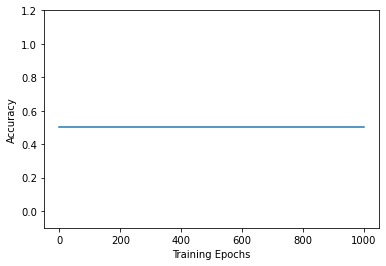

In [165]:
#Plot accuracy over epochs
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(1000), accuracy)
plt.xlabel("Training Epochs")
plt.ylabel("Accuracy")
plt.ylim([-0.1, 1.2])
plt.show()

In [166]:
print(accuracy)

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,

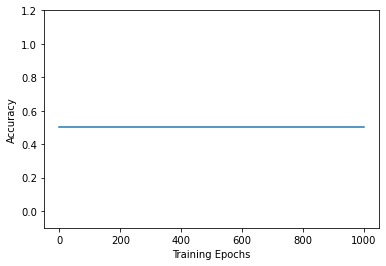

In [150]:
#Plot loss over epochs
plt.figure()
plt.plot(range(1000), loss)
plt.xlabel("Training Epochs")
plt.ylabel("Accuracy")
plt.ylim([-0.1, 1.2])
plt.show()

In [151]:
print(loss)

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,